In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv('./user_taggedmovies.dat',sep="\s+", )
df.iloc[:,1] = 'I-'+df.iloc[:,1].astype('str')
df

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second
0,75,I-353,5290,29,10,2006,23,20,15
1,78,I-4223,5264,16,4,2007,4,43,45
2,127,I-1343,1544,28,8,2007,3,42,27
3,127,I-1343,12330,28,8,2007,3,42,27
4,127,I-2080,1451,28,8,2007,3,42,47
...,...,...,...,...,...,...,...,...,...
47952,71534,I-7937,306,3,12,2007,3,7,14
47953,71534,I-8848,331,3,12,2007,3,6,19
47954,71534,I-8848,427,3,12,2007,3,6,27
47955,71534,I-25833,7671,3,12,2007,3,7,31


In [2]:
df.loc[:,'timestamps'] = df.date_year.astype('str')+'_'+ df.date_month.astype('str')+'_'+ df.date_day.astype('str')+'_'+ \
df.date_hour.astype('str')+'_'+df.date_minute.astype('str')+'_'+df.date_second.astype('str')

df.loc[:,'timestamps'] = df.loc[:,'timestamps'].apply(pd.to_datetime,format='%Y_%m_%d_%H_%M_%S')
df['dayofweek_num']=df['timestamps'].dt.dayofweek  
df['weekofyear']=df['timestamps'].dt.weekofyear
df['quarter']=df['timestamps'].dt.quarter
df['days_in_month']=df['timestamps'].dt.days_in_month
df['is_month_start']=df['timestamps'].dt.is_month_start
df['is_month_end']=df['timestamps'].dt.is_month_end
df['is_quarter_start']=df['timestamps'].dt.is_quarter_start
df['is_quarter_end']=df['timestamps'].dt.is_quarter_end
df['is_year_start']=df['timestamps'].dt.is_year_start
df['is_year_end']=df['timestamps'].dt.is_year_end
df['is_leap_year']=df['timestamps'].dt.is_leap_year

/tmp/ipykernel_1492248/2200196596.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear']=df['timestamps'].dt.weekofyear


In [3]:
df.userID.nunique(),df.movieID.nunique()

(2113, 5908)

In [ ]:
# SimHash

# PCA

## All time data pca
(attributes manually added)

In [77]:
df_selected = df.filter(regex="[^time_stamp]")
df_selected = df_selected.iloc[:,3:]
cols = df_selected.columns
df_selected

,date_day,date_month,date_year,date_hour,date_minute,date_second,dayofweek_num,weekofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year
0,29,10,2006,23,20,15,6,43,4,31,False,False,False,False,False,False,False
1,16,4,2007,4,43,45,0,16,2,30,False,False,False,False,False,False,False
2,28,8,2007,3,42,27,1,35,3,31,False,False,False,False,False,False,False
3,28,8,2007,3,42,27,1,35,3,31,False,False,False,False,False,False,False
4,28,8,2007,3,42,47,1,35,3,31,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47952,3,12,2007,3,7,14,0,49,4,31,False,False,False,False,False,False,False
47953,3,12,2007,3,6,19,0,49,4,31,False,False,False,False,False,False,False
47954,3,12,2007,3,6,27,0,49,4,31,False,False,False,False,False,False,False
47955,3,12,2007,3,7,31,0,49,4,31,False,False,False,False,False,False,False


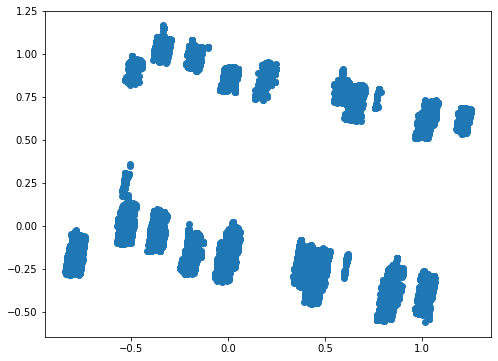

In [78]:
# instance level
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = cols
# scaler.inverse_transform(df_selected)

vectors = PCA(n_components=2).fit_transform(df_selected) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1]) # user

### PCA result analysis

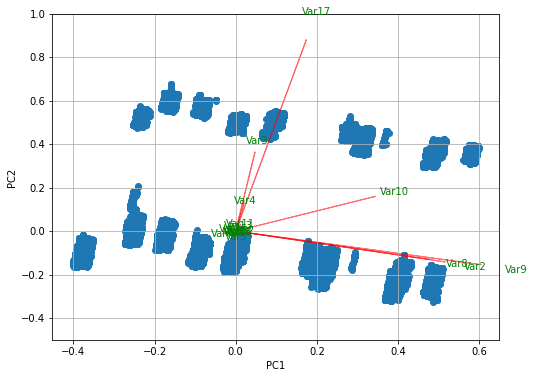

In [ ]:
# https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()
scaler.fit(df_selected)
df_selected = scaler.transform(df_selected)    

pca = PCA()
x_new = pca.fit_transform(df_selected)

def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley) # c = y 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
# plt.xlim(-1,1)
plt.ylim(-0.5,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]))
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.30573866, 0.13857541])

In [ ]:
pca.components_

array([[ 1.07091652e-02,  5.12812900e-01,  4.71044614e-02,
         1.93923310e-02,  9.73887963e-04, -5.23078471e-04,
        -2.80068987e-02,  4.75152141e-01,  6.00944295e-01,
         3.40918063e-01,  1.09310664e-02,  1.02166365e-02,
         5.59405946e-03,  5.04748078e-03, -3.67042788e-03,
         4.77088891e-03,  1.73442040e-01],
       [-2.97427789e-03, -1.40894918e-01,  3.60125459e-01,
         1.20489254e-01, -2.30357049e-02, -2.85427435e-03,
        -1.08611523e-02, -1.29245532e-01, -1.53473176e-01,
         1.58099275e-01,  2.77193602e-02,  2.35685866e-03,
         2.29400846e-02, -4.67052443e-03,  8.18319096e-03,
        -3.67424796e-03,  8.76709055e-01]])

In [ ]:
pca.components_

array([[ 1.07091652e-02,  5.12812900e-01,  4.71044614e-02,
         1.93923310e-02,  9.73887963e-04, -5.23078471e-04,
        -2.80068987e-02,  4.75152141e-01,  6.00944295e-01,
         3.40918063e-01,  1.09310664e-02,  1.02166365e-02,
         5.59405946e-03,  5.04748078e-03, -3.67042788e-03,
         4.77088891e-03,  1.73442040e-01],
       [-2.97427789e-03, -1.40894918e-01,  3.60125459e-01,
         1.20489254e-01, -2.30357049e-02, -2.85427435e-03,
        -1.08611523e-02, -1.29245532e-01, -1.53473176e-01,
         1.58099275e-01,  2.77193602e-02,  2.35685866e-03,
         2.29400846e-02, -4.67052443e-03,  8.18319096e-03,
        -3.67424796e-03,  8.76709055e-01]])

In [ ]:
# get the most important features on the PCs 
n_pcs= pca.components_.shape[0] # 2

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = cols
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df_pca = pd.DataFrame(dic.items())
df_pca

,0,1
0,PC0,quarter
1,PC1,is_leap_year
2,PC2,date_hour
3,PC3,dayofweek_num
4,PC4,days_in_month
5,PC5,date_minute
6,PC6,date_second
7,PC7,date_day
8,PC8,is_month_start
9,PC9,is_month_end


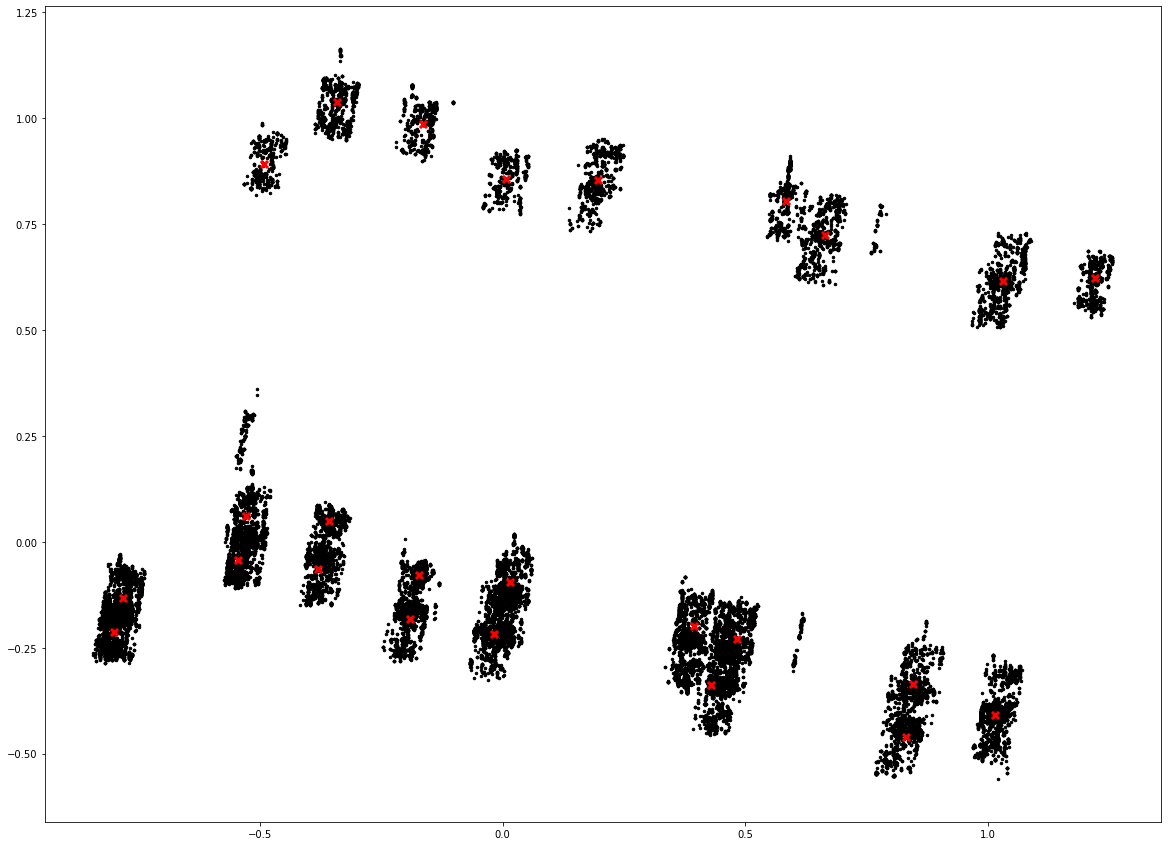

In [79]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1

plt.rcParams["figure.figsize"] = (20, 15)

plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
# plt.title('K-means clustering on the TSFresh Features (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()


In [ ]:
# df_selected = pd.DataFrame(df_selected)
# df_selected.columns = cols
# df_selected['cluster'] = label_pred
# df_selected = pd.concat([df.iloc[:,:3],df_selected], axis=1)
# df_selected.head()

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second,dayofweek_num,weekofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year,cluster
0,75,353,5290,0.933333,0.818182,0.25,1.000000,0.338983,0.254237,1.000000,0.823529,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18
1,78,4223,5264,0.500000,0.272727,0.50,0.173913,0.728814,0.762712,0.000000,0.294118,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13
2,127,1343,1544,0.900000,0.636364,0.50,0.130435,0.711864,0.457627,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
3,127,1343,12330,0.900000,0.636364,0.50,0.130435,0.711864,0.457627,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22
4,127,2080,1451,0.900000,0.636364,0.50,0.130435,0.711864,0.796610,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22


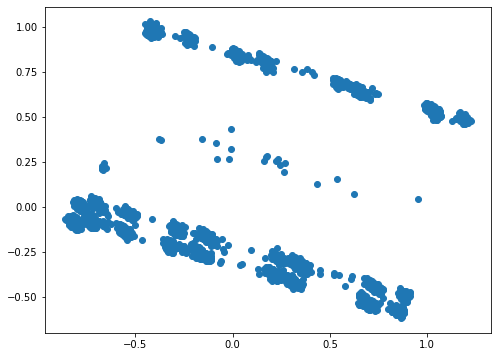

In [82]:
# user level
df_selected = df.filter(regex="[^time_stamp]").iloc[:,3:] # all data
scaler = MinMaxScaler()
df_selected = scaler.fit_transform(df_selected)
df_selected = pd.DataFrame(df_selected)
df_selected.columns = df.filter(regex="[^time_stamp]").iloc[:,3:].columns
df_selected = pd.concat([df.iloc[:,:3],df_selected], axis=1)
df_user = df_selected.groupby('userID').median().iloc[:,2:]
pca = PCA()
vectors = pca.fit_transform(df_user) 
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors[:,0],vectors[:,1])

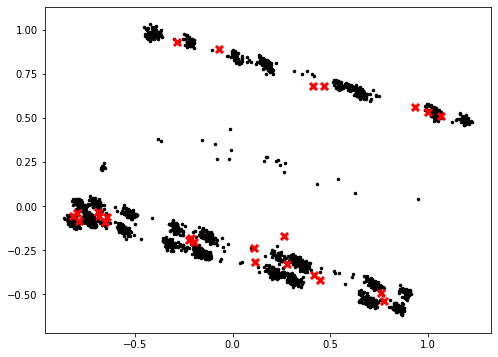

In [84]:
estimator = KMeans(n_clusters=25,random_state=0)#构造聚类器
estimator.fit(vectors)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和

x_min, x_max = vectors[:, 0].min() - 0.1, vectors[:, 0].max() + 0.1
y_min, y_max = vectors[:, 1].min() - 0.1, vectors[:, 1].max() + 0.1


plt.plot(vectors[:, 0], vectors[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = estimator.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=50, linewidths=3,
            color='red', zorder=10)
# plt.title('K-means clustering on the TSFresh Features (PCA-reduced data)\n'
#           'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
# plt.xticks(())
# plt.yticks(())
plt.show()


In [87]:
pd.Series(label_pred).value_counts()

24    133
1     125
23    119
20    115
3     112
6     108
7     107
19     96
11     94
2      94
4      91
8      86
18     82
14     82
5      81
17     78
15     78
12     75
9      69
13     62
22     54
10     51
21     43
0      43
16     35
dtype: int64

In [83]:
df_user

,date_month,date_year,date_hour,date_minute,date_second,dayofweek_num,weekofyear,quarter,days_in_month,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year
userID,,,,,,,,,,,,,,,,
75,0.818182,0.25,1.000000,0.338983,0.254237,1.000000,0.823529,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.272727,0.50,0.173913,0.728814,0.762712,0.000000,0.294118,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127,0.636364,0.50,0.130435,0.728814,0.474576,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
170,0.818182,0.25,0.521739,0.881356,0.949153,0.000000,0.843137,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,0.727273,0.50,0.521739,0.381356,0.449153,0.750000,0.735294,0.833333,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71497,0.636364,0.50,0.956522,0.474576,0.593220,0.166667,0.666667,0.666667,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71509,0.545455,0.75,0.956522,0.601695,0.457627,0.166667,0.509804,0.666667,1.000000,1.0,0.0,1.0,0.0,0.0,0.0,1.0
71525,0.454545,0.25,0.608696,0.915254,0.322034,1.000000,0.431373,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Graph


In [ ]:
# test
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
 
G = nx.Graph()
Matrix = np.array(
    [
        [0, 1, 1, 1, 1, 1, 0, 0],  # a
        [0, 0, 1, 0, 1, 0, 0, 0],  # b
        [0, 0, 0, 1, 0, 0, 0, 0],  # c
        [0, 0, 0, 0, 1, 0, 0, 0],  # d
        [0, 0, 0, 0, 0, 1, 0, 0],  # e
        [0, 0, 1, 0, 0, 0, 1, 1],  # f
        [0, 0, 0, 0, 0, 1, 0, 1],  # g
        [0, 0, 0, 0, 0, 1, 1, 0]  # h
    ]
)
pos = nx.layout.spring_layout(G)
for i in range(len(Matrix)):
    for j in range(len(Matrix)):
        G.add_edge(i, j)
 
nx.draw(G)
plt.show()

## use centroids of Tagging + all time-series data pca

In [ ]:
dis_l1 = (pow(centroids[:,0],2)+pow(centroids[:,1],2))
dis_l1

array([0.63241715, 0.02248993, 0.62930406, 0.2478305 , 1.23416511,
       0.98672805, 0.4745856 , 0.05654733, 0.68729706, 0.65283004,
       0.04274901, 0.83148844, 0.24738381, 0.19822052, 1.44291516,
       0.10012788, 0.91722114, 0.33598854, 0.94125638, 0.66908064,
       0.05475995, 0.52203415, 0.02484719, 0.04968762, 0.14452386])

In [ ]:
df_dis = pd.DataFrame(np.zeros([25,25]))

for i in range(0,25):
  for j in range(0,25):
    # df_dis.iloc[i, j] = pow((dis_l1[i]-dis_l1[j]),2) #l1
    df_dis.iloc[i, j] = pow((centroids[:,0][i]-centroids[:,0][j]),2) + pow((centroids[:,1][i]-centroids[:,1][j]),2)

### Scaled

In [ ]:
scaler = MinMaxScaler()
df_dis = scaler.fit_transform(df_dis)
df_dis = pd.DataFrame(df_dis)
df_dis.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0.000000,0.369166,0.591543,0.576100,0.306035,0.850079,0.005916,0.233900,0.597780,0.007641,0.268587,0.836907,0.554847,0.581889,0.290077,0.157314,0.008569,0.028715,0.842244,0.604850,0.411339,0.002361,0.448504,0.368090,0.536075
1,0.253450,0.000000,0.131862,0.071302,0.436469,0.551820,0.204759,0.044845,0.140429,0.284976,0.015980,0.387861,0.066540,0.063579,0.450478,0.083591,0.306555,0.151908,0.382412,0.139962,0.006533,0.233243,0.075940,0.002965,0.043233
2,0.870731,0.282713,0.000000,0.034645,0.964297,0.957047,0.810242,0.663746,0.000324,0.956314,0.464993,0.543156,0.032141,0.053665,0.965830,0.768434,0.893564,0.728986,0.475495,0.000299,0.171546,0.876128,0.819554,0.212907,0.072073
3,0.602848,0.108678,0.024629,0.000000,0.672215,0.642304,0.544374,0.342180,0.029470,0.655150,0.225612,0.356468,0.000540,0.001507,0.686615,0.423269,0.646349,0.471900,0.323531,0.027426,0.053728,0.591306,0.383858,0.079961,0.005995
4,0.420732,0.874011,0.900632,0.883145,0.000000,0.224268,0.479541,0.859353,0.902064,0.330269,0.878686,0.402185,0.885226,0.878543,0.003019,0.713099,0.392137,0.567314,0.438134,0.900868,0.878615,0.430670,0.839171,0.880744,0.878246


In [ ]:
df_dis.describe().loc['75%',:].mean()

0.5742124276703159

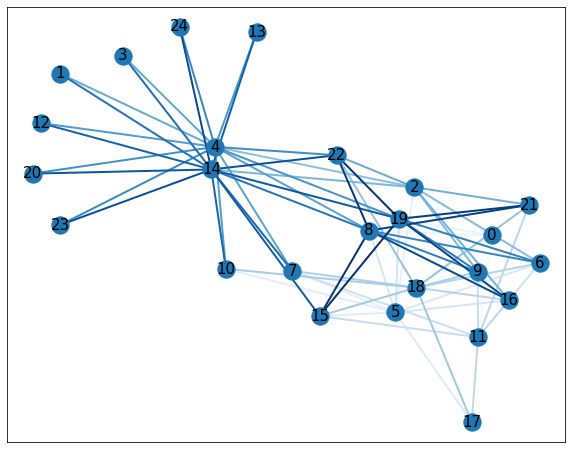

75


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import random
random.seed(0)        
np.random.seed(0)
minDis = 0.8
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)

pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

### UnScaled 

In [ ]:
df_dis.describe().loc['75%',:].mean()

1.46120866498082

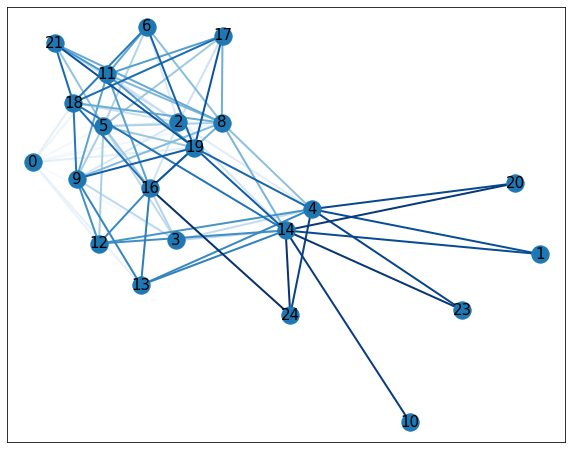

78


In [ ]:
random.seed(0)        
np.random.seed(0)
minDis = 1.4612
G = nx.Graph()

for i in range(25):
    for j in range(25):
      dis = df_dis.iloc[i,j]
      # dis != "NaN" and dis != float("inf")  for pow(log(dis),2)
      if  dis > minDis:
        G.add_edge(i, j, weight=dis)

plt.rcParams["figure.figsize"] = (10, 8)
pos = nx.layout.spring_layout(G)
# nx.draw(G)
M = G.number_of_edges()
edge_colors = range(M)

nodes = nx.draw_networkx_nodes(G, pos)
edges = nx.draw_networkx_edges(G, pos, edge_color=edge_colors, edge_cmap=plt.cm.Blues, width=2)
labels = nx.draw_networkx_labels(G,pos, font_size=15)
plt.show()
print(M)

# Hashing
TSFresh featuers：压缩维度，保留语义，寻找candidate pairs

In [24]:
import swifter

import multiprocessing as mp
print('CPU numbers:',mp.cpu_count())
def _apply_df(args):
    df, func, kwargs = args
    return df.apply(func, **kwargs)
def apply_by_multiprocessing(df, func, **kwargs):
#     print(kwargs)
    workers = kwargs.pop('workers')
    pool = mp.Pool(processes=workers)
    result = pool.map(_apply_df, [(d, func, kwargs) for d in np.array_split(df, workers)])
    pool.close()
    return pd.concat(list(result))
#apply_by_multiprocessing(fullset['Text'], process_text, workers=cores)

CPU numbers: 32


In [5]:
import pickle
with open('./TSFresh/TSFresh_user.pickle', 'rb') as handle:
    extracted_features = pickle.load(handle)

with open('./TSFresh/TSFresh_movie.pickle', 'rb') as handle:
    extracted_features_movie = pickle.load(handle)
    
extracted_features.shape,extracted_features_movie.shape 

((2113, 3148), (5908, 3148))

In [4]:
extracted_features.shape,extracted_features_movie.shape
# extracted_features_tag.pickle / extracted_features_movie_tag.pickle ((984, 1574), (5798, 1574))

((984, 4722), (5798, 4722))

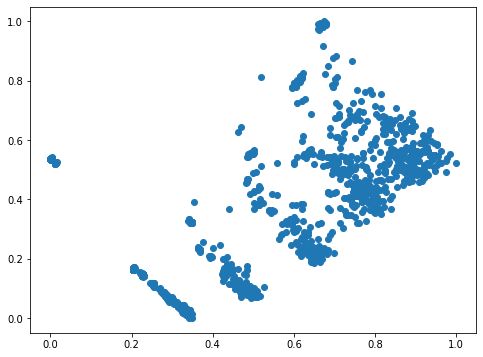

In [6]:
scaler = MinMaxScaler()
tsf_u = scaler.fit_transform(extracted_features)
vectors_u = PCA().fit_transform(tsf_u) #高维度PCA降维到2维 (2113, 2113)
scaler = MinMaxScaler()
vectors_u = scaler.fit_transform(vectors_u)
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors_u[:,0],vectors_u[:,1])

In [7]:
vectors_u.shape

(2113, 2113)

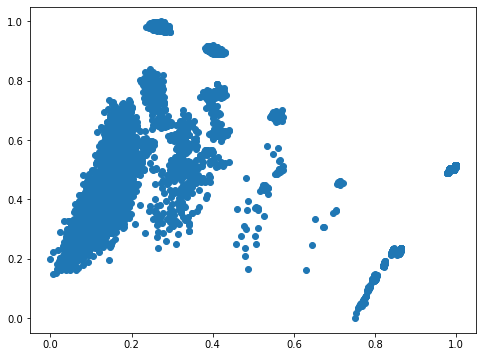

In [8]:
scaler = MinMaxScaler()
tsf_m = scaler.fit_transform(extracted_features_movie)
vectors_m = PCA().fit_transform(tsf_m) # (5908, 3148)
scaler = MinMaxScaler()
vectors_m = scaler.fit_transform(vectors_m)
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(vectors_m[:,0],vectors_m[:,1])

## Hyperplae LSH

In [71]:
tsf_u = pd.DataFrame(tsf_u) # normalized Tsfresh
# tsf_u = pd.DataFrame(vectors_u) # pca-ed normalized Tsfresh

# tsf_u.columns = extracted_features.columns
tsf_u

,0,1,2,3,4,5,6,7,8,9,...,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147
0,0.0,0.0,0.0,0.0,0.000338,0.000549,0.000241,0.481481,0.561404,0.933333,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
1,0.0,0.0,0.0,0.0,0.000181,0.000167,0.000241,0.481481,0.561404,0.500000,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
2,0.0,1.0,1.0,1.0,0.007760,0.011784,0.000000,0.481481,0.561404,0.900000,...,0.000000,0.000000,0.000000,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
3,0.0,0.0,0.0,0.0,0.000350,0.000588,0.000241,0.481481,0.561404,0.966667,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
4,1.0,0.0,0.0,0.0,0.000603,0.000876,0.321429,0.314815,0.561404,0.816667,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,0.0,0.0,1.0,1.0,0.013867,0.021083,0.001786,0.482407,0.562303,0.900000,...,0.040751,0.037229,0.033810,0.0,0.295015,0.233248,0.252720,0.241004,0.263537,0.216082
2109,1.0,0.0,1.0,1.0,0.002522,0.000679,0.010405,0.480461,0.559733,0.000000,...,0.091975,0.096533,0.098608,0.0,0.123645,0.153959,0.309181,0.338965,0.340736,0.276984
2110,0.0,0.0,0.0,0.0,0.000121,0.000078,0.000241,0.481481,0.561404,0.333333,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237
2111,0.0,1.0,1.0,1.0,0.000688,0.001099,0.000000,0.481481,0.561404,0.933333,...,0.000000,0.043128,0.067747,0.0,0.201632,0.153959,0.228765,0.234152,0.256564,0.229237


In [74]:
tsf_m = pd.DataFrame(tsf_m)
# tsf_m = pd.DataFrame(vectors_m) 
tsf_m

,0,1,2,3,4,5,6,7,8,9,...,3138,3139,3140,3141,3142,3143,3144,3145,3146,3147
0,1.0,1.0,1.0,1.0,0.403687,0.372926,0.139614,0.486507,0.490000,0.400000,...,0.772376,0.772506,0.783619,0.0,0.096316,0.199822,0.19845,0.247043,0.216387,0.260405
1,1.0,1.0,1.0,1.0,0.142588,0.113302,0.119444,0.491379,0.495652,0.366667,...,0.748027,0.664560,0.617023,0.0,0.096316,0.199822,0.19845,0.247043,0.216387,0.260405
2,1.0,0.0,0.0,1.0,0.047780,0.042953,0.211111,0.505747,0.522000,0.566667,...,0.302747,0.162715,0.000000,0.0,0.096316,0.199822,0.19845,0.247043,0.216387,0.260405
3,1.0,1.0,0.0,1.0,0.039127,0.029882,0.116667,0.508621,0.490000,0.366667,...,0.302747,0.162715,0.000000,0.0,0.096316,0.199822,0.19845,0.247043,0.216387,0.260405
4,1.0,0.0,0.0,1.0,0.115877,0.111015,0.148889,0.483908,0.483571,0.666667,...,0.652936,0.562903,0.494780,0.0,0.096316,0.199822,0.19845,0.247043,0.216387,0.260405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,1.0,1.0,0.0,1.0,0.030474,0.036510,0.288889,0.333333,0.360000,0.866667,...,0.382024,0.371160,0.346090,0.0,0.096316,0.199822,0.19845,0.247043,0.216387,0.260405
5904,0.0,1.0,1.0,1.0,0.020692,0.026159,0.000000,0.482759,0.490000,0.900000,...,0.382024,0.371160,0.346090,0.0,0.096316,0.199822,0.19845,0.247043,0.216387,0.260405
5905,0.0,1.0,1.0,1.0,0.004138,0.000384,0.000000,0.482759,0.490000,0.033333,...,0.000000,0.000000,0.346090,0.0,0.096316,0.199822,0.19845,0.247043,0.216387,0.260405
5906,0.0,0.0,0.0,0.0,0.001129,0.000250,0.183333,0.482759,0.490000,0.100000,...,0.382024,0.371160,0.346090,0.0,0.096316,0.199822,0.19845,0.247043,0.216387,0.260405


<AxesSubplot:ylabel='Frequency'>

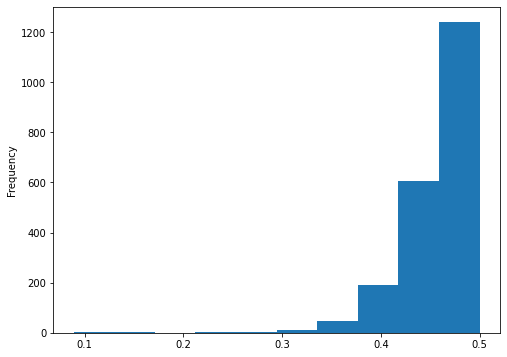

In [166]:
tsf_u.mean().plot.hist()

In [7]:
# map tsf_u index ID to the real User ID
extracted_features.index[0]

75

In [72]:
import numpy as np
import turicreate
from scipy.sparse import csr_matrix
from sklearn.metrics.pairwise import pairwise_distances
import time
from copy import copy
import matplotlib.pyplot as plt
%matplotlib inline

'''compute norm of a sparse vector'''
def norm(x):
    sum_sq=x.dot(x.T)
    norm=np.sqrt(sum_sq)
    return(norm)

In [26]:
def sframe_to_scipy(tsf_u):
    tsf_u_stack = pd.DataFrame(tsf_u.stack()).reset_index()
    tsf_u_stack.columns = ['uid','col_id','value']
    
    
    # Map feature words to integers 
#     mapping = {attr:i for i, attr in enumerate(extracted_features.columns)}
    
    # Create numpy arrays that contain the data for the sparse matrix.
    row_id = np.array(tsf_u_stack['uid']) 
    col_id = np.array(tsf_u_stack['col_id']) # unique word id
    data = np.array(tsf_u_stack['value'])  # tfidf v

    width, height = tsf_u_stack['uid'].max()+1, tsf_u_stack['col_id'].max()+1
    
    
    # Create a sparse matrix.
    corpus = csr_matrix((data, (row_id, col_id)), shape=(width, height))
    
    return corpus

In [27]:
tsf_u_stack = pd.DataFrame(tsf_u.stack()).reset_index()
tsf_u_stack.columns = ['uid','col_id','value']
tsf_u_stack

,uid,col_id,value
0,0,0,0.000000
1,0,1,0.000000
2,0,2,0.000000
3,0,3,0.000000
4,0,4,0.000338
...,...,...,...
6651719,2112,3143,0.153959
6651720,2112,3144,0.228765
6651721,2112,3145,0.234152
6651722,2112,3146,0.256564


In [28]:
row_id = np.array(tsf_u_stack['uid']) 
col_id = np.array(tsf_u_stack['col_id']) # unique word id
data = np.array(tsf_u_stack['value'])  # tfidf v

width, height = tsf_u_stack['uid'].max()+1, tsf_u_stack['col_id'].max()+1

In [29]:
mapping = {attr:i for i, attr in enumerate(extracted_features.columns)}

In [30]:
corpus = csr_matrix((data, (row_id, col_id)), shape=(width, height))

In [31]:
corpus

<2113x3148 sparse matrix of type '<class 'numpy.float64'>'
	with 6651724 stored elements in Compressed Sparse Row format>

In [32]:
## Train the LSH
def generate_random_vectors(dim, n_vectors):
    return np.random.randn(dim, n_vectors)

In [33]:
np.random.seed(42)
n_vectors = 16
random_vectors = generate_random_vectors(corpus.shape[1], n_vectors)
random_vectors.shape

(3148, 16)

In [34]:
random_vectors

array([[ 0.49671415, -0.1382643 ,  0.64768854, ..., -1.91328024,
        -1.72491783, -0.56228753],
       [-1.01283112,  0.31424733, -0.90802408, ..., -0.29169375,
        -0.60170661,  1.85227818],
       [-0.01349722, -1.05771093,  0.82254491, ..., -0.71984421,
        -0.46063877,  1.05712223],
       ...,
       [-0.96798996,  1.17564443, -1.28980842, ..., -0.04657702,
         0.21763906,  0.11874575],
       [-1.03635598,  0.27943909, -1.04525955, ...,  0.80366925,
         0.19720036,  0.40491666],
       [-0.17852362,  1.62976993,  1.87044321, ..., -0.7074085 ,
        -0.39801416, -0.15393119]])

In [35]:
bin_indices_bits = corpus.dot(random_vectors) >= 0
bin_indices_bits

array([[False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       ...,
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False, False,  True],
       [False,  True, False, ..., False,  True,  True]])

In [36]:
bin_indices_bits.shape

(2113, 16)

In [37]:
np.array(bin_indices_bits,dtype=int)

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 1, 1]])

In [38]:
# convert binary hash code into int bucket
powers_of_two = 1 << np.arange(n_vectors - 1, -1, step=-1)
bin_indices = bin_indices_bits.dot(powers_of_two)

In [39]:
pd.Series(bin_indices).nunique()

47

<AxesSubplot:ylabel='Frequency'>

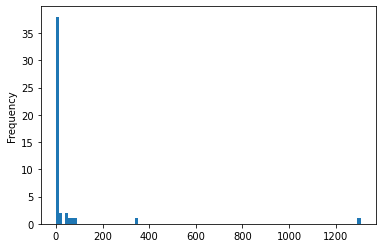

In [40]:
pd.Series(bin_indices).value_counts().plot.hist(bins=100)

In [41]:
pd.Series(bin_indices).value_counts()

20121    1307
20123     349
20127      92
20379      71
20125      56
20383      51
19995      46
19993      18
3739       16
20377      12
20381      12
3743        8
3999        7
3611        6
19999       5
3741        5
3867        4
28575       4
20251       3
24219       3
3995        3
3997        2
3609        2
3737        2
20255       2
28571       2
20187       2
28315       2
24221       2
28319       2
12187       1
28381       1
3615        1
11807       1
3993        1
24475       1
3865        1
20189       1
20119       1
7835        1
20443       1
3771        1
3795        1
7839        1
20185       1
28447       1
19997       1
dtype: int64

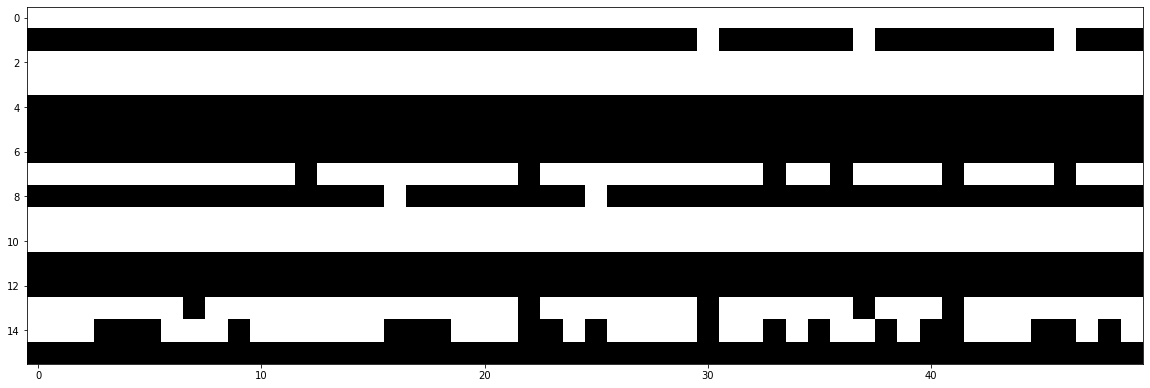

In [42]:
plt.rcParams["figure.figsize"] = (20, 20)
plt.imshow(bin_indices_bits[100:150,:].T, cmap='binary')

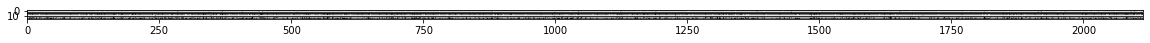

In [43]:
plt.imshow(bin_indices_bits.T, cmap='binary')

In [44]:
bin_indices_bits.shape

(2113, 16)

In [45]:
from collections import defaultdict 

table = defaultdict(list)
for idx, bin_index in enumerate(bin_indices):
    #if bin_index not in table:
        #table[bin_index] = []    
    # Fetch the list of document ids associated with the bin and add the document id to the end.
    table[bin_index].append(idx)

In [46]:
model = {'data': data, # 原来的sparse matrix
             'table': table, # bin:[id] dict hash table
             'random_vectors': random_vectors,  
             'bin_indices': bin_indices, # 10进制的binary hash code
             'bin_indices_bits': bin_indices_bits} #binary hash code

In [47]:
def compare_bits(model, id_1, id_2):
    bits1 = model['bin_indices_bits'][id_1]
    bits2 = model['bin_indices_bits'][id_2]
    print('Number of agreed bits: ', np.sum(bits1 == bits2))
    return np.sum(bits1 == bits2)

In [48]:
similariy = compare_bits(model, 1, 100)

Number of agreed bits:  16


In [49]:
from collections import defaultdict 

def train_lsh(data, n_vectors, seed=0):    
    if seed is not None:
        np.random.seed(seed)

    dim = data.shape[1]
    random_vectors = generate_random_vectors(dim, n_vectors)  

    # Partition data points into bins,
    bin_indices_bits = data.dot(random_vectors) >= 0
    # and encode bin index bits into integers
    powers_of_two = 1 << np.arange(n_vectors - 1, -1, step=-1)
    bin_indices = bin_indices_bits.dot(powers_of_two)

    # Update `table` so that `table[i]` is the list of document ids with bin index equal to i
    table = defaultdict(list)
    for idx, bin_index in enumerate(bin_indices):
        #if bin_index not in table:
            #table[bin_index] = []
            
        # Fetch the list of document ids associated with the bin and add the document id to the end.
        table[bin_index].append(idx) # YOUR CODE HERE
  
    # Note that we're storing the bin_indices here
    # so we can do some ad-hoc checking with it,
    # this isn't actually required
    model = {'data': data, # 原来的sparse matrix
             'table': table, # bin:[id] dict hash table
             'random_vectors': random_vectors,  
             'bin_indices': bin_indices, # 10进制的binary hash code
             'bin_indices_bits': bin_indices_bits} #binary hash code
    return model

In [50]:
corpus = sframe_to_scipy(tsf_u)
model = train_lsh(corpus, 16, seed=0)

In [51]:
compare_bits(model, 1, 100)

Number of agreed bits:  12


12

<AxesSubplot:ylabel='Frequency'>

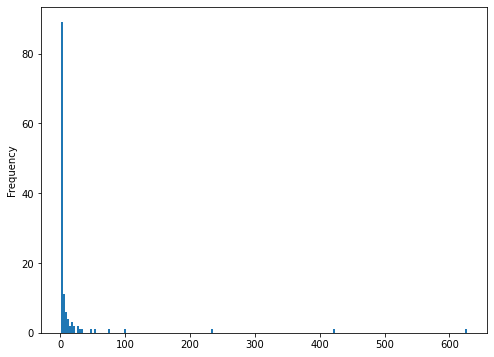

In [52]:
plt.rcParams["figure.figsize"] = (8, 6)
pd.Series(model['bin_indices']).value_counts().plot.hist(bins=200)

In [53]:
pd.Series(model['bin_indices']).value_counts()

5344     627
5345     422
5360     235
38128     99
38384     76
        ... 
54754      1
54752      1
62688      1
54736      1
55024      1
Length: 128, dtype: int64

In [54]:
pd.Series(model['bin_indices']).value_counts().value_counts()[1] # 201个bucket only has 1 user

63

## Inspect bins

In [55]:
def get_similarity_items(corpus, item_id, topn=5):
    """
    Get the top similar items for a given item id.
    The similarity measure here is based on cosine distance.
    """
    query = corpus[item_id]
    scores = corpus.dot(query.T).toarray().ravel()
    best = np.argpartition(scores, -topn)[-topn:]
    similar_items = sorted(zip(best, scores[best]), key=lambda x: -x[1])
    similar_item_ids = [similar_item for similar_item, _ in similar_items]

    return similar_item_ids

In [56]:
get_similarity_items(corpus, 0, 10)

[1840, 1807, 1095, 1685, 203, 14, 0, 1097, 1711, 379]

In [57]:
extracted_features.index[379],extracted_features.index[0]

(12917, 75)

In [58]:
dict_Uc['U-12917'],dict_Uc['U-75']

NameError: name 'dict_Uc' is not defined

In [59]:
cossim(tsf_u.iloc[0,:], tsf_u.iloc[1840,:])

NameError: name 'cossim' is not defined

In [60]:
dict(model['table'])

{5345: [0,
  6,
  14,
  15,
  22,
  25,
  26,
  27,
  28,
  35,
  38,
  39,
  53,
  57,
  58,
  62,
  66,
  69,
  77,
  78,
  87,
  89,
  102,
  106,
  111,
  119,
  120,
  124,
  129,
  131,
  134,
  147,
  154,
  156,
  157,
  160,
  161,
  162,
  170,
  174,
  175,
  179,
  184,
  185,
  203,
  208,
  209,
  219,
  223,
  227,
  228,
  231,
  238,
  247,
  249,
  251,
  257,
  261,
  265,
  266,
  268,
  277,
  279,
  283,
  286,
  289,
  298,
  299,
  305,
  311,
  326,
  330,
  335,
  342,
  352,
  371,
  372,
  373,
  379,
  381,
  384,
  386,
  399,
  403,
  412,
  417,
  418,
  423,
  427,
  428,
  431,
  433,
  438,
  457,
  459,
  470,
  475,
  476,
  482,
  483,
  487,
  496,
  514,
  519,
  538,
  543,
  550,
  556,
  565,
  566,
  570,
  571,
  575,
  582,
  586,
  588,
  614,
  616,
  621,
  624,
  629,
  632,
  649,
  655,
  660,
  664,
  665,
  668,
  670,
  681,
  692,
  700,
  706,
  718,
  719,
  722,
  737,
  750,
  753,
  755,
  756,
  764,
  771,
  774,
  777,
  7

In [66]:
v = [803, 1080, 1560, 1668]
bucket_size = len(v)
[cossim(extracted_features.iloc[v[i],:], extracted_features.iloc[v[u],:]) for u in range(bucket_size) for i in range(bucket_size) if u!=i]

[0.9826307022608055,
 0.9737712619565124,
 0.9987180776322963,
 0.9826307022608055,
 0.9911405596508507,
 0.9839126245474671,
 0.9737712619565124,
 0.9911405596508507,
 0.9750531842434724,
 0.9987180776322963,
 0.9839126245474671,
 0.9750531842434724]

In [67]:
from tqdm import tqdm
bucket_sims = []
for k,v in tqdm(dict(model['table']).items()):
    bucket_size = len(v)
    if bucket_size>1:
        bucket_sims.append(
            [cossim(extracted_features.iloc[v[i],:], extracted_features.iloc[v[u],:]) \
             for u in range(bucket_size) for i in range(bucket_size) if u!=i]
        )
        

  0%|          | 0/128 [00:00<?, ?it/s]/tmp/ipykernel_1492248/1471083435.py:11: RuntimeWarning: invalid value encountered in arccos
  ang = np.arccos(cosine)
  0%|          | 0/128 [00:21<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
with open('./bucket_sims.pickle', 'wb') as handle:
    pickle.dump(bucket_sims, handle)

In [343]:
b_len, meanSim = [],[]
for b in bucket_sims:
    b_len.append(len(b))
    meanSim.append(np.mean(b))
df_sim = pd.DataFrame({'len':b_len,'sim':meanSim})

In [346]:
df_sim.sort_values(by='len')

,len,sim
158,2,1.000000
36,2,0.999646
130,2,0.500561
129,2,0.972803
127,2,0.999980
...,...,...
20,2162,0.777727
15,4556,0.971030
27,4556,0.918369
8,10712,0.980946


In [355]:
df_sim.groupby('len').mean(sim).sort_values(by='sim')

,sim
len,
1122,0.706125
552,0.739375
72,0.776299
2162,0.777727
702,0.802797
380,0.811194
462,0.820165
506,0.837406
110,0.839020


<AxesSubplot:ylabel='Frequency'>

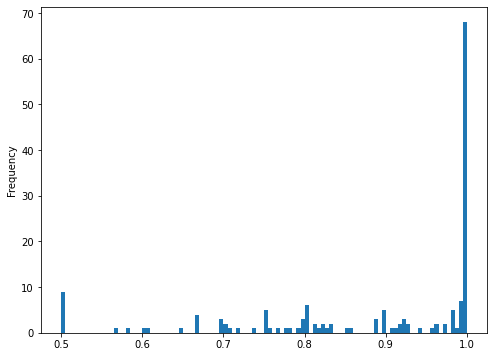

In [360]:
df_sim.sim.plot.hist(bins=100)

<AxesSubplot:>

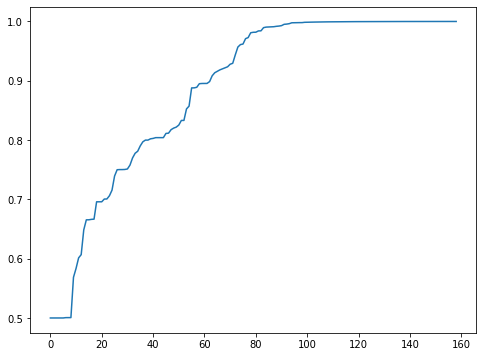

In [353]:
pd.Series(list(df_sim.sim.sort_values())).plot()

In [292]:
res_sim = []
for b in bucket_sims:
    for sim in b:
        res_sim.append(sim)

<AxesSubplot:ylabel='Frequency'>

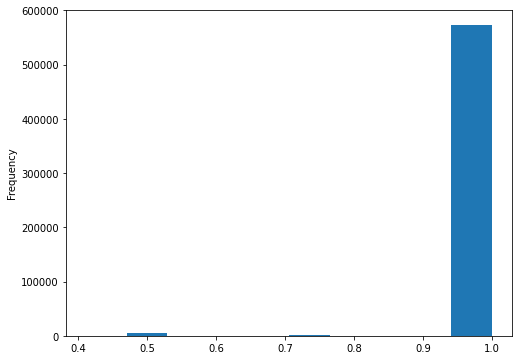

In [320]:
pd.Series(pd.Series(res_sim).sort_values()).dropna().plot.hist()

## Query the LSH model

In [68]:
from itertools import combinations
num_vector = 32
search_radius = 3
def search_nearby_bins(query_bin_bits, table, search_radius=2, initial_candidates=set()):
    """
    For a given query vector and trained LSH model, return all candidate neighbors for
    the query among all bins within the given search radius.
    
    Example usage
    -------------
    >>> model = train_lsh(corpus, num_vector=16, seed=143)
    >>> q = model['bin_index_bits'][0]  # vector for the first document
  
    >>> candidates = search_nearby_bins(q, model['table'])
    """
    num_vector = len(query_bin_bits)
    powers_of_two = 1 << np.arange(num_vector-1, -1, -1)
    
    # Allow the user to provide an initial set of candidates.
    candidate_set = copy(initial_candidates)
    
    for different_bits in combinations(range(num_vector), search_radius):       
        # Flip the bits (n_1,n_2,...,n_r) of the query bin to produce a new bit vector.
        ## Hint: you can iterate over a tuple like a list
        alternate_bits = copy(query_bin_bits)
        for i in different_bits:
            alternate_bits[i] = ~alternate_bits[i] 
        
        # Convert the new bit vector to an integer index
        nearby_bin = alternate_bits.dot(powers_of_two)
        
        # Fetch the list of documents belonging to the bin indexed by the new bit vector.
        # Then add those documents to candidate_set
        # Make sure that the bin exists in the table!
        # Hint: update() method for sets lets you add an entire list to the set
        if nearby_bin in table:
            more_docs = table[nearby_bin] # Get all document_ids of the bin
            candidate_set.update(more_docs)
            
    return candidate_set

In [371]:
search_nearby_bins(model['bin_indices_bits'][999], model['table'], search_radius=0)

{130, 999}

In [374]:
model['bin_indices_bits'][999] == model['bin_indices_bits'][130] # 完全相同两用户

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [376]:
search_nearby_bins(model['bin_indices_bits'][999], model['table'], search_radius=3)

{280, 377, 385, 710, 917, 1696, 1940, 2022}

In [22]:
def query(vec, model, k, max_search_radius):
  
    data = model['data']
    table = model['table']
    random_vectors = model['random_vectors']
    num_vector = random_vectors.shape[1]
    
    
    # Compute bin index for the query vector, in bit representation.
    bin_index_bits = (vec.dot(random_vectors) >= 0).flatten()
    
    # Search nearby bins and collect candidates
    candidate_set = set()
    for search_radius in range(max_search_radius+1):
        candidate_set = search_nearby_bins(bin_index_bits, table, search_radius, initial_candidates=candidate_set)
    
    # Sort candidates by their true distances from the query
    nearest_neighbors = turicreate.SFrame({'id':candidate_set})
    candidates = data[np.array(list(candidate_set)),:]
    nearest_neighbors['distance'] = pairwise_distances(candidates, vec, metric='cosine').flatten()
    
    return nearest_neighbors.topk('distance', k, reverse=True), len(candidate_set)

In [391]:
pairwise_distances(tsf_u.iloc[0:1,:], tsf_u.iloc[1840:1841,:], metric='cosine')

array([[0.00037895]])

In [400]:
pairwise_distances(tsf_u.iloc[0:1,:], tsf_u.iloc[10:11,:], metric='cosine')

array([[0.08677042]])

In [399]:
cossim(tsf_u.iloc[0,:], tsf_u.iloc[1840,:]),cossim(tsf_u.iloc[0,:], tsf_u.iloc[10,:])

(0.9912366154843527, 0.866419679054433)

In [382]:
query(corpus[0,:], model, k=10, max_search_radius=3)

(Columns:
 	id	int
 	distance	float
 
 Rows: 10
 
 Data:
 +------+------------------------+
 |  id  |        distance        |
 +------+------------------------+
 |  0   | 5.551115123125783e-16  |
 | 203  | 8.676267388474379e-05  |
 |  14  | 9.156559447398571e-05  |
 | 1840 | 0.00037895361470330347 |
 | 170  | 0.0005164065633833648  |
 | 379  | 0.0005468900649865382  |
 | 2064 |  0.000675608526435223  |
 | 1706 | 0.0008986774623305216  |
 | 381  | 0.0009159873961021026  |
 | 1514 | 0.0009562226063321022  |
 +------+------------------------+
 [10 rows x 2 columns],
 1305)

In [380]:
get_similarity_items(corpus, 0, 10)

[1840, 1807, 1095, 1685, 203, 14, 0, 1097, 1711, 379]

In [413]:
get_similarity_items(corpus, 999, 10)

[999, 1857, 598, 1341, 884, 702, 780, 500, 1565, 1365]

In [411]:
query(corpus[999,:], model, k=10, max_search_radius=0)

(Columns:
 	id	int
 	distance	float
 
 Rows: 2
 
 Data:
 +-----+------------------------+
 |  id |        distance        |
 +-----+------------------------+
 | 999 | 1.3322676295501878e-15 |
 | 130 |  0.05758810756525856   |
 +-----+------------------------+
 [2 rows x 2 columns],
 2)

In [414]:
%%time
num_candidates_history = []
query_time_history = []
max_distance_from_query_history = []
min_distance_from_query_history = []
average_distance_from_query_history = []

for max_search_radius in range(17):
    start=time.time()
    result, num_candidates = query(corpus[999,:], model, k=10,
                                   max_search_radius=max_search_radius)
    end=time.time()
    query_time = end-start
    
    print('Radius:', max_search_radius)
    print(result.sort('distance'))
    
    average_distance_from_query = result['distance'][1:].mean()
    max_distance_from_query = result['distance'][1:].max()
    min_distance_from_query = result['distance'][1:].min()
    
    num_candidates_history.append(num_candidates)
    query_time_history.append(query_time)
    average_distance_from_query_history.append(average_distance_from_query)
    max_distance_from_query_history.append(max_distance_from_query)
    min_distance_from_query_history.append(min_distance_from_query)


Radius: 0
+-----+------------------------+
|  id |        distance        |
+-----+------------------------+
| 999 | 1.3322676295501878e-15 |
| 130 |  0.05758810756525856   |
+-----+------------------------+
[2 rows x 2 columns]

Radius: 1
+-----+------------------------+
|  id |        distance        |
+-----+------------------------+
| 999 | 1.3322676295501878e-15 |
| 130 |  0.05758810756525856   |
+-----+------------------------+
[2 rows x 2 columns]

Radius: 2
+------+------------------------+
|  id  |        distance        |
+------+------------------------+
| 999  | 1.3322676295501878e-15 |
|  17  |  0.05464403880557711   |
| 130  |  0.05758810756525856   |
| 1604 |  0.10052435265496251   |
+------+------------------------+
[4 rows x 2 columns]

Radius: 3
+------+------------------------+
|  id  |        distance        |
+------+------------------------+
| 999  | 1.3322676295501878e-15 |
|  17  |  0.05464403880557711   |
| 130  |  0.05758810756525856   |
| 1696 |  0.0676238380

KeyboardInterrupt: 

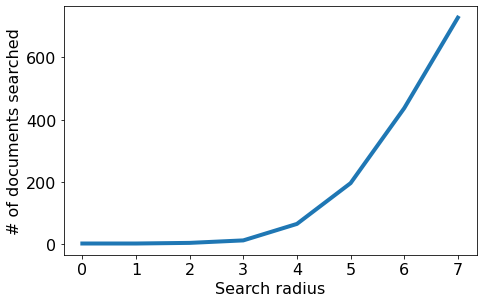

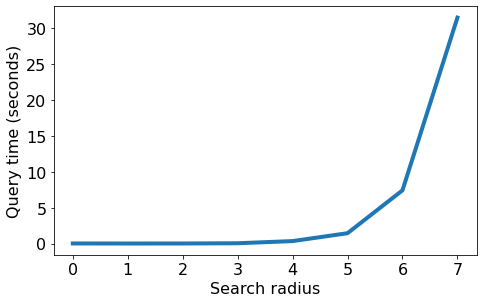

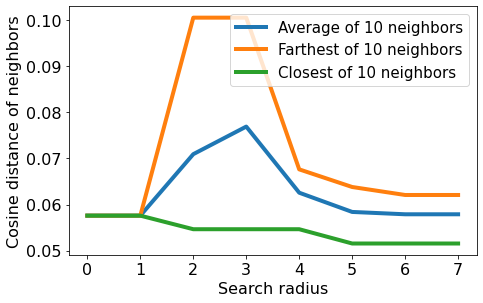

In [415]:
plt.figure(figsize=(7,4.5))
plt.plot(num_candidates_history, linewidth=4)
plt.xlabel('Search radius')
plt.ylabel('# of documents searched')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(query_time_history, linewidth=4)
plt.xlabel('Search radius')
plt.ylabel('Query time (seconds)')
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(average_distance_from_query_history, linewidth=4, label='Average of 10 neighbors')
plt.plot(max_distance_from_query_history, linewidth=4, label='Farthest of 10 neighbors')
plt.plot(min_distance_from_query_history, linewidth=4, label='Closest of 10 neighbors')
plt.xlabel('Search radius')
plt.ylabel('Cosine distance of neighbors')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

In [418]:
def brute_force_query(vec, data, k):
    num_data_points = data.shape[0]
    
    # Compute distances for ALL data points in training set
    nearest_neighbors = turicreate.SFrame({'id':range(num_data_points)})
    nearest_neighbors['distance'] = pairwise_distances(data, vec, metric='cosine').flatten()
    
    return nearest_neighbors.topk('distance', k, reverse=True)

In [419]:
precision = {i:[] for i in range(5,20)}
average_distance  = {i:[] for i in range(5,20)}
query_time = {i:[] for i in range(5,20)}
num_candidates_history = {i:[] for i in range(5,20)}
ground_truth = {}

num_queries = 10
docs = np.random.choice(corpus.shape[0], num_queries, replace=False)

for i, ix in enumerate(docs):
    ground_truth[ix] = set(brute_force_query(corpus[ix,:], corpus, k=25)['id'])
    # Get the set of 25 true nearest neighbors

for num_vector in range(5,20):
    print('num_vector = %s' % (num_vector))
    model = train_lsh(corpus, num_vector, seed=143)
    
    for i, ix in enumerate(docs):
        start = time.time()
        result, num_candidates = query(corpus[ix,:], model, k=10, max_search_radius=3)
        end = time.time()
        
        query_time[num_vector].append(end-start)
        precision[num_vector].append(len(set(result['id']) & ground_truth[ix])/10.0)
        average_distance[num_vector].append(result['distance'][1:].mean())
        num_candidates_history[num_vector].append(num_candidates)

num_vector = 5
num_vector = 6
num_vector = 7
num_vector = 8
num_vector = 9
num_vector = 10
num_vector = 11
num_vector = 12
num_vector = 13
num_vector = 14
num_vector = 15
num_vector = 16
num_vector = 17
num_vector = 18
num_vector = 19


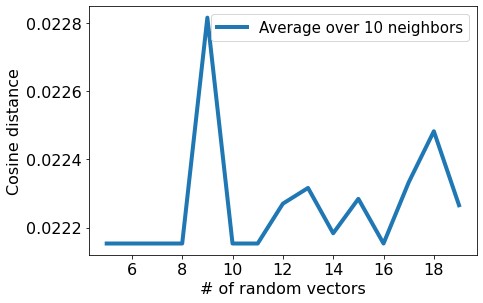

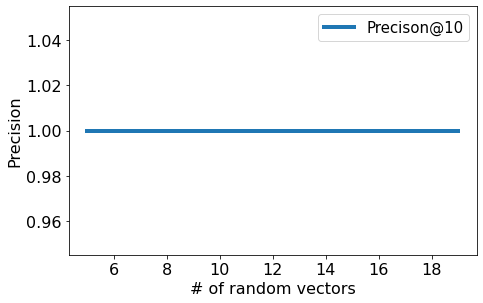

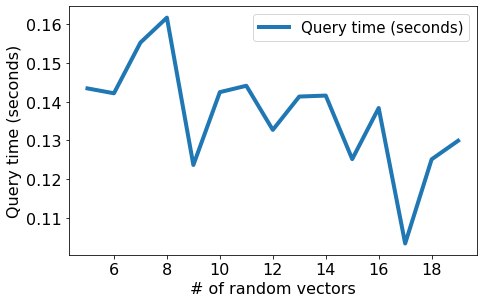

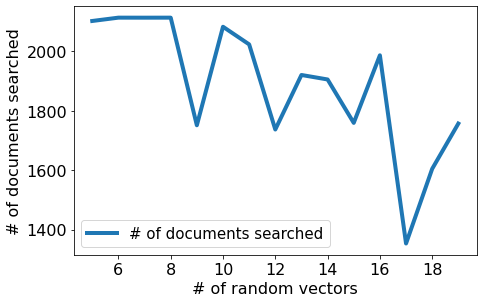

In [420]:
plt.figure(figsize=(7,4.5))
plt.plot(range(5,20), [np.mean(average_distance[i]) for i in range(5,20)], linewidth=4, label='Average over 10 neighbors')
plt.xlabel('# of random vectors')
plt.ylabel('Cosine distance')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(range(5,20), [np.mean(precision[i]) for i in range(5,20)], linewidth=4, label='Precison@10')
plt.xlabel('# of random vectors')
plt.ylabel('Precision')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(range(5,20), [np.mean(query_time[i]) for i in range(5,20)], linewidth=4, label='Query time (seconds)')
plt.xlabel('# of random vectors')
plt.ylabel('Query time (seconds)')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

plt.figure(figsize=(7,4.5))
plt.plot(range(5,20), [np.mean(num_candidates_history[i]) for i in range(5,20)], linewidth=4,
         label='# of documents searched')
plt.xlabel('# of random vectors')
plt.ylabel('# of documents searched')
plt.legend(loc='best', prop={'size':15})
plt.rcParams.update({'font.size':16})
plt.tight_layout()

## Export to Json

In [75]:
corpus_u = sframe_to_scipy(tsf_u)
model_u = train_lsh(corpus_u, 16, seed=0)

corpus_m = sframe_to_scipy(tsf_m)
model_m = train_lsh(corpus_m, 16, seed=0)

In [ ]:
# 通过添加hyperplane得到hashcode->聚类code->分组 来合并小bucket

In [687]:
pd.Series(np.array(model_u['bin_indices_bits'],dtype=int).ravel()).value_counts(0)

0    20817
1    12991
dtype: int64

In [665]:
pd.Series([''.join(str(i)) for i in np.array(model_u['bin_indices_bits'],dtype=int)]).value_counts() # 8-bit

[1 1 0 0 0 0 0 0]    1936
[1 1 0 0 0 0 0 1]      65
[0 1 0 0 0 0 0 0]      54
[1 1 1 0 0 0 0 0]      36
[1 1 0 0 0 1 0 0]       8
[1 0 0 0 0 0 0 0]       4
[0 1 1 0 0 0 0 0]       3
[0 1 0 0 0 0 0 1]       3
[1 1 1 0 0 0 0 1]       1
[1 1 0 0 1 1 0 0]       1
[1 0 0 0 1 1 0 0]       1
[1 1 0 0 0 1 0 1]       1
dtype: int64

In [688]:
pd.Series([''.join(str(i)) for i in np.array(model_u['bin_indices_bits'],dtype=int)]).value_counts() #  16-bit

[0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0]    627
[0 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1]    422
[0 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0]    235
[1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0]     99
[1 0 0 1 0 1 0 1 1 1 1 1 0 0 0 0]     76
                                    ... 
[0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0]      1
[1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0]      1
[1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0]      1
[1 0 1 1 0 1 0 0 1 1 1 1 0 1 0 0]      1
[1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0]      1
Length: 128, dtype: int64

In [689]:
pd.Series(np.array(model_m['bin_indices_bits'],dtype=int).ravel()).value_counts(0)

0    53842
1    40686
dtype: int64

In [78]:
pd.Series(model_u['bin_indices']).value_counts()

5344     627
5345     422
5360     235
38128     99
38384     76
        ... 
54754      1
54752      1
62688      1
54736      1
55024      1
Length: 128, dtype: int64

In [77]:
# 两级hash B1T1
df_ub = pd.DataFrame({'uid':extracted_features.index, 'bid':model_u['bin_indices']})
dict_ub = dict(df_ub.values)
len(dict_ub)

2113

In [79]:
pd.Series(model_u['bin_indices']).nunique() #128 Unique buckets

128

In [80]:
dict_bf = dict(pd.Series(model_u['bin_indices']).value_counts()) # bucket to freq
pd.Series(model_u['bin_indices']).value_counts().nunique() #28 unique freq values

28

<AxesSubplot:ylabel='Frequency'>

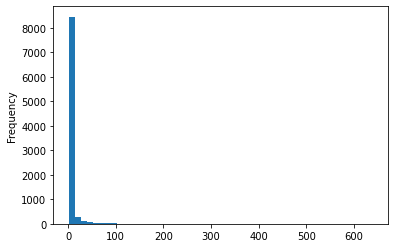

In [85]:
df.tagID.value_counts().plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

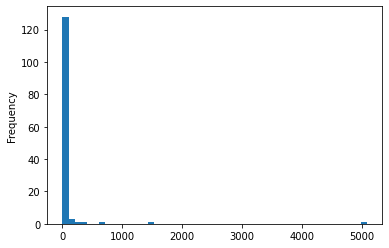

In [88]:
df.tagID.value_counts().value_counts().plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

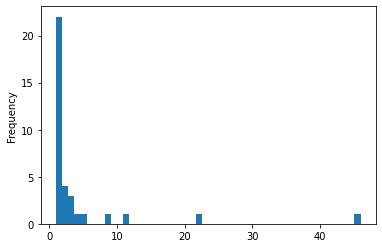

In [91]:
df.tagID.value_counts().value_counts().value_counts().plot.hist(bins=50)

<AxesSubplot:ylabel='Frequency'>

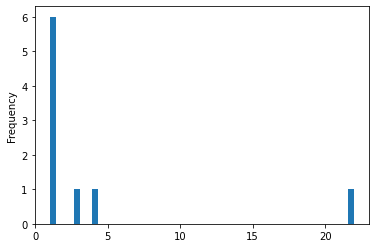

In [95]:
df.tagID.value_counts().value_counts().value_counts().value_counts().plot.hist(bins=50)

In [81]:
dict_bu = dict(df_ub.groupby('bid').apply(lambda x:list(x['uid']))) #bucket to user

In [150]:
lst_bucket = [dict_bf[dict_ub[i]] for i in df.userID]
df['bucket'] = lst_bucket
# df['bucket_tag'] = df['bucket']+df['tagID']
df['bucket_tag'] = df['bucket'].astype('str')+'-'+df['tag_freq'].astype('str') # bucket freq + tag freq
# df['bucket_tag'] = df['bucket'].astype('str')+'-'+df['tagID'].astype('str')  #bucket freq + tag ID

In [151]:
dict_tf = df.tagID.value_counts()
dict_tf

6800     640
605      454
93       406
1925     402
247      331
        ... 
6898       1
2308       1
2800       1
13015      1
2049       1
Name: tagID, Length: 9079, dtype: int64

In [152]:
df['tag_freq'] = [dict_tf[i] for i in df.tagID]
df['tag_freq'].value_counts()

1     5079
2     2878
3     1884
4     1388
5     1320
      ... 
82      82
81      81
79      79
76      76
46      46
Name: tag_freq, Length: 136, dtype: int64

In [153]:
df.groupby('tagID')['userID'].count().value_counts()#多数tag只出现一次 for one user

1      5079
2      1439
3       628
4       347
5       264
       ... 
331       1
243       1
147       1
139       1
231       1
Name: userID, Length: 136, dtype: int64

In [154]:
df

,userID,movieID,tagID,date_day,date_month,date_year,date_hour,date_minute,date_second,timestamps,...,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_leap_year,bucket,tag_freq,bucket_tag
0,75,I-353,5290,29,10,2006,23,20,15,2006-10-29 23:20:15,...,False,False,False,False,False,False,False,422,1,422-1
1,78,I-4223,5264,16,4,2007,4,43,45,2007-04-16 04:43:45,...,False,False,False,False,False,False,False,627,41,627-41
2,127,I-1343,1544,28,8,2007,3,42,27,2007-08-28 03:42:27,...,False,False,False,False,False,False,False,52,3,52-3
3,127,I-1343,12330,28,8,2007,3,42,27,2007-08-28 03:42:27,...,False,False,False,False,False,False,False,52,3,52-3
4,127,I-2080,1451,28,8,2007,3,42,47,2007-08-28 03:42:47,...,False,False,False,False,False,False,False,52,15,52-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47952,71534,I-7937,306,3,12,2007,3,7,14,2007-12-03 03:07:14,...,False,False,False,False,False,False,False,1,31,1-31
47953,71534,I-8848,331,3,12,2007,3,6,19,2007-12-03 03:06:19,...,False,False,False,False,False,False,False,1,12,1-12
47954,71534,I-8848,427,3,12,2007,3,6,27,2007-12-03 03:06:27,...,False,False,False,False,False,False,False,1,32,1-32
47955,71534,I-25833,7671,3,12,2007,3,7,31,2007-12-03 03:07:31,...,False,False,False,False,False,False,False,1,3,1-3


In [155]:
df.groupby('bucket_tag')['userID'].count() # use tag freq

bucket_tag
1-1      1061
1-10      116
1-101     109
1-102       8
1-103      44
         ... 
99-9       16
99-91       1
99-92       2
99-94       2
99-97       2
Name: userID, Length: 2477, dtype: int64

In [147]:
df.groupby(['userID','bucket_tag'])['userID'].count() # use tag ID

userID  bucket_tag
75      422-5290      1
78      627-5264      1
127     52-11371      1
        52-11860      1
        52-12330      1
                     ..
71534   1-7668        1
        1-7669        1
        1-7670        1
        1-7671        1
        1-7672        1
Name: userID, Length: 21325, dtype: int64

In [149]:
df.groupby(['userID','bucket_tag'])['userID'].count()[13716]

bucket_tag
99-1133     1
99-396      1
99-74       1
99-9870    10
Name: userID, dtype: int64

In [202]:
df_btf.groupby('userID').apply(lambda x: list(x['bucket_tag'])[0])

userID
75       422-1
78      627-41
127       52-1
170     20-406
175       18-2
190       2-14
267    422-101
325       17-1
383       47-1
dtype: object

In [196]:
df_btf = pd.DataFrame(df.groupby(['userID','bucket_tag'])['userID'].count()).head(30) # use tag freq
df_btf=df_btf.rename(columns={'userID':'count'})
df_btf.reset_index()
df_btf=df_btf.reset_index()
df_btf.sort_values(by=['userID','count'], ascending=False)
df_btf

,userID,bucket_tag,count
0,75,422-1,1
1,78,627-41,1
2,127,52-1,4
3,127,52-11,1
4,127,52-111,1
5,127,52-14,1
6,127,52-15,2
7,127,52-153,1
8,127,52-16,1
9,127,52-168,1


In [162]:
df.groupby(['userID','bucket_tag'])['userID'].count()[13716]

bucket_tag
99-10     10
99-214     1
99-224     1
99-37      1
Name: userID, dtype: int64

In [161]:
df.groupby(['userID','bucket_tag'])['userID'].count().value_counts() # use tag freq

1      6309
2      1441
3       722
4       464
5       289
       ... 
373       1
485       1
147       1
113       1
167       1
Name: userID, Length: 134, dtype: int64

<AxesSubplot:ylabel='Frequency'>

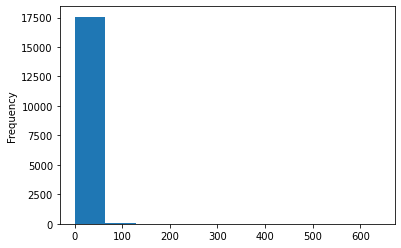

In [126]:
df.groupby('bucket_tag')['userID'].count().plot.hist()

In [127]:
df.groupby('bucket_tag')['userID'].count().value_counts()

1      12071
2       2470
3        975
4        532
5        339
       ...  
90         1
186        1
282        1
81         1
89         1
Name: userID, Length: 103, dtype: int64

In [69]:
bits_vec_u = np.array(model_u['bin_indices_bits'],dtype=int)
bits_vec_m = np.array(model_m['bin_indices_bits'],dtype=int)

bits_vec_u.shape,bits_vec_m.shape

NameError: name 'model_m' is not defined

In [ ]:
# 选取部分user，对比真实特征的cos dis和hash code distance

In [625]:
def cossim(u,v):
    norm = np.linalg.norm(u)*np.linalg.norm(v) # 向量范数之积 所有元素的平方和
    cosine = u@v/norm  #矩阵乘法
#     ang = np.arccos(cosine)
    return cosine

In [628]:
cossim(tsf_u.loc[1620,:],tsf_u.loc[1320,:])

0.9922231901140217

In [629]:
1-pairwise_distances([tsf_u.loc[1620,:]],[tsf_u.loc[1320,:]], metric='cosine')

array([[0.99222319]])

In [673]:
user_sample = pd.Series(tsf_u.index).sample(100, random_state=0)
# extracted_features.index[user_sample]
sample_cos_sim = {}
for i in user_sample:
    sample_cos_sim[i] = []
    for o in user_sample:
            sample_cos_sim[i].append(cossim(tsf_u.iloc[i,:],tsf_u.iloc[o,:]))

In [674]:
df_true_sim = pd.DataFrame(sample_cos_sim)
df_true_sim.index = user_sample
df_true_sim.head()

,1620,1320,1772,760,1217,530,1993,1105,453,161,...,1382,314,801,1210,1688,1752,796,1031,391,1200
1620,1.000000,0.992223,0.989910,0.862373,0.987205,0.942900,0.956608,0.993613,0.958778,0.943586,...,0.837597,0.987981,0.880490,0.878217,0.904957,0.870268,0.993080,0.865656,0.874493,0.872480
1320,0.992223,1.000000,0.994365,0.863007,0.985312,0.942923,0.962825,0.993190,0.962265,0.934961,...,0.840193,0.990054,0.881326,0.874601,0.908409,0.873723,0.992503,0.870575,0.874734,0.880074
1772,0.989910,0.994365,1.000000,0.862223,0.990768,0.942400,0.962045,0.994394,0.955106,0.937858,...,0.839718,0.991265,0.883321,0.874323,0.915372,0.872996,0.989319,0.872355,0.878705,0.876479
760,0.862373,0.863007,0.862223,1.000000,0.853332,0.893249,0.870767,0.859243,0.866637,0.869435,...,0.934864,0.854186,0.924399,0.927775,0.887320,0.913950,0.857464,0.918379,0.920461,0.925186
1217,0.987205,0.985312,0.990768,0.853332,1.000000,0.935615,0.963116,0.992277,0.960950,0.944482,...,0.837285,0.997031,0.888059,0.872377,0.907504,0.875371,0.995516,0.869225,0.884457,0.869846


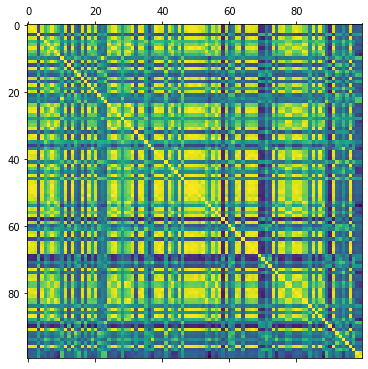

In [632]:
plt.matshow(df_true_sim)

In [675]:
# 使用 Jaccard on hash code

from sklearn.metrics import jaccard_score
sample_hash_sim = {}
for i in user_sample:
    sample_hash_sim[i] = []
    for o in user_sample:        
        sample_hash_sim[i].append(jaccard_score(bits_vec_u[i,:],bits_vec_u[o,:]))

In [676]:
jaccard_score(bits_vec_u[1620,:],bits_vec_u[1320,:]),\
cossim(bits_vec_u[1620,:],bits_vec_u[1320,:])

(1.0, 0.9999999999999999)

In [677]:
bits_vec_u[1630,:],bits_vec_u[1320,:]

(array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 1]),
 array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 0, 0]))

In [678]:
df_hash_sim = pd.DataFrame(sample_hash_sim)
df_hash_sim.index = user_sample
df_hash_sim.head()

,1620,1320,1772,760,1217,530,1993,1105,453,161,...,1382,314,801,1210,1688,1752,796,1031,391,1200
1620,1.000000,1.000000,1.000000,0.736842,1.000000,0.833333,0.833333,1.000000,0.882353,0.789474,...,0.736842,1.000000,0.666667,0.777778,0.777778,0.684211,1.000000,0.736842,0.833333,0.882353
1320,1.000000,1.000000,1.000000,0.736842,1.000000,0.833333,0.833333,1.000000,0.882353,0.789474,...,0.736842,1.000000,0.666667,0.777778,0.777778,0.684211,1.000000,0.736842,0.833333,0.882353
1772,1.000000,1.000000,1.000000,0.736842,1.000000,0.833333,0.833333,1.000000,0.882353,0.789474,...,0.736842,1.000000,0.666667,0.777778,0.777778,0.684211,1.000000,0.736842,0.833333,0.882353
760,0.736842,0.736842,0.736842,1.000000,0.736842,0.800000,0.714286,0.736842,0.666667,0.681818,...,0.894737,0.736842,0.900000,0.944444,0.750000,0.750000,0.736842,0.894737,0.800000,0.750000
1217,1.000000,1.000000,1.000000,0.736842,1.000000,0.833333,0.833333,1.000000,0.882353,0.789474,...,0.736842,1.000000,0.666667,0.777778,0.777778,0.684211,1.000000,0.736842,0.833333,0.882353


In [679]:
pd.Series(df_hash_sim.values.flatten()).value_counts()

1.000000    1600
0.833333     896
0.882353     720
0.937500     684
0.777778     652
0.736842     640
0.750000     604
0.789474     474
0.842105     316
0.800000     302
0.888889     288
0.666667     280
0.700000     246
0.714286     244
0.761905     218
0.850000     188
0.809524     180
0.823529     152
0.722222     152
0.941176     138
0.894737     130
0.944444     122
0.684211      96
0.636364      90
0.650000      86
0.900000      78
0.772727      78
0.727273      68
0.818182      42
0.681818      36
0.857143      32
0.652174      30
0.608696      22
0.695652      20
0.782609      18
0.619048      18
0.904762      18
0.947368      12
0.863636      10
0.739130      10
0.590909       4
0.952381       2
0.625000       2
0.708333       2
dtype: int64

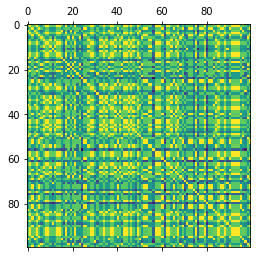

In [608]:
plt.matshow(df_hash_sim) #16-BIT

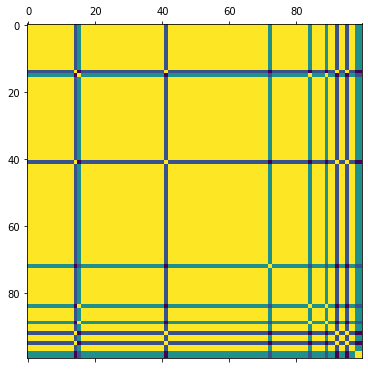

In [637]:
plt.matshow(df_hash_sim) #8-BIT

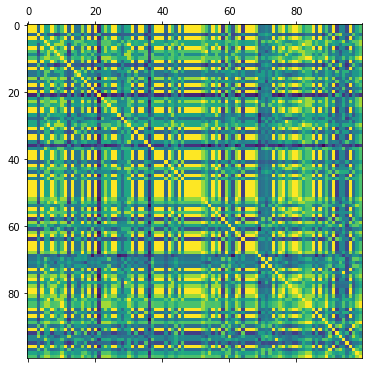

In [680]:
plt.matshow(df_hash_sim) #32-BIT

In [681]:
np.abs(df_true_sim - df_hash_sim).mean().mean() # 32-bit

0.0944611741409526

In [609]:
np.abs(df_true_sim - df_hash_sim).mean().mean() # 16-bit

0.12404646264137256

In [641]:
np.abs(df_true_sim - df_hash_sim).mean().mean() # 8-bit

0.11169510790882944

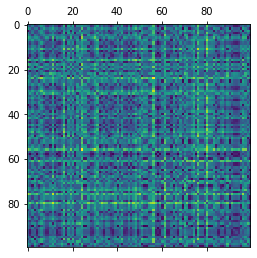

In [610]:
plt.matshow(df_true_sim - df_hash_sim)

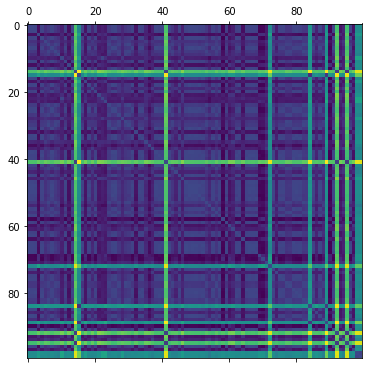

In [642]:
plt.matshow(df_true_sim - df_hash_sim) #8-bit

In [683]:
# 使用 cos sim on hash code
sample_hash_sim = {}
for i in user_sample:
    sample_hash_sim[i] = []
    for o in user_sample:        
        sample_hash_sim[i].append(cossim(bits_vec_u[i,:],bits_vec_u[o,:]))
df_hash_sim = pd.DataFrame(sample_hash_sim)
df_hash_sim.index = user_sample
df_hash_sim.head()

,1620,1320,1772,760,1217,530,1993,1105,453,161,...,1382,314,801,1210,1688,1752,796,1031,391,1200
1620,1.000000,1.000000,1.000000,0.852013,1.000000,0.912871,0.912871,1.000000,0.939336,0.888523,...,0.852013,1.000000,0.808290,0.876714,0.876714,0.814092,1.000000,0.852013,0.912871,0.939336
1320,1.000000,1.000000,1.000000,0.852013,1.000000,0.912871,0.912871,1.000000,0.939336,0.888523,...,0.852013,1.000000,0.808290,0.876714,0.876714,0.814092,1.000000,0.852013,0.912871,0.939336
1772,1.000000,1.000000,1.000000,0.852013,1.000000,0.912871,0.912871,1.000000,0.939336,0.888523,...,0.852013,1.000000,0.808290,0.876714,0.876714,0.814092,1.000000,0.852013,0.912871,0.939336
760,0.852013,0.852013,0.852013,1.000000,0.852013,0.888889,0.833333,0.852013,0.800327,0.811107,...,0.944444,0.852013,0.948683,0.971825,0.857493,0.857493,0.852013,0.944444,0.888889,0.857493
1217,1.000000,1.000000,1.000000,0.852013,1.000000,0.912871,0.912871,1.000000,0.939336,0.888523,...,0.852013,1.000000,0.808290,0.876714,0.876714,0.814092,1.000000,0.852013,0.912871,0.939336


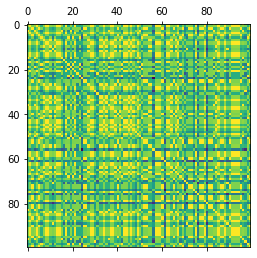

In [612]:
plt.matshow(df_hash_sim)

In [684]:
np.abs(df_true_sim - df_hash_sim).mean().mean() # 32-bit

0.03271406487653064

In [613]:
np.abs(df_true_sim - df_hash_sim).mean().mean() # 16-bit

0.06598847383731143

In [668]:
np.abs(df_true_sim - df_hash_sim).mean().mean() # 8-bit

0.07906384096442658

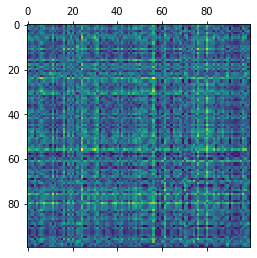

In [614]:
plt.matshow(df_true_sim - df_hash_sim)

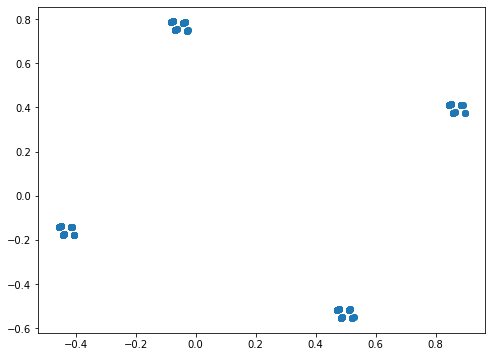

In [615]:
# 可视化PCA后的hash bits
bits_vec_pca = PCA().fit_transform(bits_vec_u) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(bits_vec_pca[:,0],bits_vec_pca[:,1])

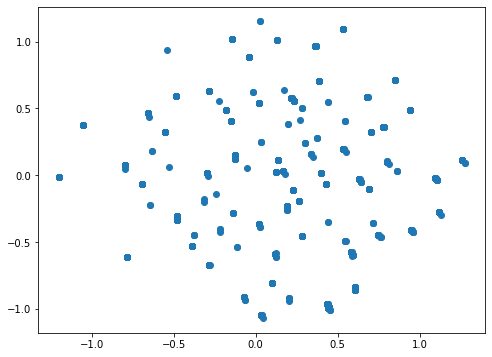

In [346]:
bits_vec_pca = PCA().fit_transform(bits_vec_m) #高维度PCA降维到2维
plt.rcParams["figure.figsize"] = (8, 6)
plt.scatter(bits_vec_pca[:,0],bits_vec_pca[:,1])

In [424]:
def getClusterPred(bits_vec, n_clusters=25):
    estimator = KMeans(n_clusters,random_state=0)#构造聚类器
    estimator.fit(bits_vec)#聚类
    label_pred = estimator.labels_ #获取聚类标签
#     centroids = estimator.cluster_centers_ #获取聚类中心
#     inertia = estimator.inertia_ # 获取聚类准则的总和
    return label_pred

In [425]:
label_pred_u = getClusterPred(bits_vec_u, 25)
pd.Series(label_pred_u).value_counts()

1     694
2     352
4     284
6     181
7     119
9      70
8      62
10     48
5      45
11     43
12     32
14     29
3      24
13     22
16     20
17     16
0      13
18     12
15     12
19      9
20      6
21      6
24      5
22      5
23      4
dtype: int64

In [426]:
label_pred_m = getClusterPred(bits_vec_m, 25)
pd.Series(label_pred_m).value_counts()

1     2402
2     1051
3      578
4      522
0      410
6      354
7      243
5      176
13      24
15      22
8       15
17      15
11      14
18      13
23      11
9        9
10       8
12       7
14       6
16       6
19       5
21       5
22       4
24       4
20       4
dtype: int64

In [427]:
res_df_u = pd.DataFrame('u-'+pd.Series(label_pred_u,extracted_features.index).astype(str).add_prefix('U-')).reset_index()
res_df_u.columns = ['U','u']
res_df_m = pd.DataFrame('i-'+pd.Series(label_pred_m,extracted_features_movie.index).astype(str).add_prefix('I-')).reset_index()
res_df_m.columns = ['I','i']
res_df_m

,I,i
0,I-1,i-6
1,I-2,i-3
2,I-3,i-6
3,I-5,i-4
4,I-6,i-20
...,...,...
5903,I-64993,i-1
5904,I-65006,i-1
5905,I-65037,i-3
5906,I-65126,i-1


In [428]:
dict_Uu = dict(zip(res_df_u['U'],res_df_u['u']))
dict_uU = dict(res_df_u.groupby('u').apply(lambda x:list(x['U'])))
dict_Ii = dict(zip(res_df_m['I'],res_df_m['i']))
dict_iI = dict(res_df_m.groupby('i').apply(lambda x:list(x['I'])))

In [429]:
res_output = {'Uu':dict_Uu,'Ii':dict_Ii}
res_output_1 = {'uU':dict_uU,'iI':dict_iI}

In [431]:
import json
jsonString = json.dumps(res_output)
jsonFile = open(f"output/TSF_pca_16LSH_25Kmeans_Uu_Ii.json", "w")
# jsonFile = open(f"output/TSF_pca_16LSH_25Kmeans_uU_iI.json", "w")

jsonFile.write(jsonString)
jsonFile.close()

In [ ]:
# 下面是直接hash code-> 10进制bucket number->reindex 小的bucket id

In [188]:
extracted_features.index

Int64Index([   75,    78,   127,   170,   175,   190,   267,   325,   383,
              476,
            ...
            71331, 71420, 71478, 71483, 71487, 71497, 71509, 71525, 71529,
            71534],
           dtype='int64', length=2113)

In [189]:
dict_c_index = dict(zip(set(model['bin_indices']),range(360)))

In [244]:
lst_oneHash = pd.Series(pd.Series(range(len(tsf_u)), index=pd.Series(model['bin_indices']))) [pd.Series(pd.Series(model['bin_indices']).value_counts()==1)].keys()
lst_oneHash

Int64Index([13448, 62888, 17832, 21929, 30632, 29992], dtype='int64')

In [252]:
pd.Series(model['bin_indices']).unique()

array([30120, 21928, 30088, 21896, 20904, 30184, 21992, 29096, 29864,
       28840, 21640, 20872, 21672, 21960, 29160, 29832, 30152, 20936,
       29064, 29928, 21704, 21736, 20616, 20648, 20968, 29896, 54696,
       62856, 28808, 13448, 29128, 62888, 20680, 17832, 21929, 28904,
       30632, 29992])

In [259]:
for i in lst_oneHash:
    dict_c_index[i] = 38
dict_c_index

{30632: 38,
 30088: 1,
 21896: 2,
 21640: 3,
 29832: 4,
 20872: 5,
 29064: 6,
 20616: 7,
 62856: 8,
 28808: 9,
 13448: 38,
 30120: 11,
 20904: 12,
 21928: 13,
 29096: 14,
 29864: 15,
 28840: 16,
 21672: 17,
 20648: 18,
 54696: 19,
 62888: 38,
 21929: 38,
 20936: 22,
 30152: 23,
 21960: 24,
 21704: 25,
 29896: 26,
 29128: 27,
 20680: 28,
 30184: 29,
 21992: 30,
 29160: 31,
 29928: 32,
 21736: 33,
 20968: 34,
 28904: 35,
 29992: 38,
 17832: 38}

In [264]:
dict_c_index.keys()

dict_keys([30632, 30088, 21896, 21640, 29832, 20872, 29064, 20616, 62856, 28808, 13448, 30120, 20904, 21928, 29096, 29864, 28840, 21672, 20648, 54696, 62888, 21929, 20936, 30152, 21960, 21704, 29896, 29128, 20680, 30184, 21992, 29160, 29928, 21736, 20968, 28904, 29992, 17832])

In [270]:
# 将复杂的bucket number map成ID
model['bin_index'] = [dict_c_index[i] for i in model['bin_indices']]

In [271]:
pd.Series(model['bin_indices']).value_counts().values

array([692, 349, 284, 179, 119,  70,  62,  48,  45,  43,  29,  29,  22,
        21,  18,  15,  12,  12,   7,   7,   6,   6,   5,   5,   4,   4,
         3,   3,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1])

In [273]:
len(pd.Series(model['bin_index']).value_counts())

33

In [ ]:
# 得到 UID->BucketID 对应关系

In [274]:
res_df = pd.DataFrame('c-'+pd.Series(model['bin_index'],extracted_features.index).astype(str).add_prefix('U-')).reset_index()
res_df.columns = ['UID','BucketID']
res_df

,UID,BucketID
0,U-75,c-11
1,U-78,c-13
2,U-127,c-13
3,U-170,c-13
4,U-175,c-1
...,...,...
2108,U-71497,c-2
2109,U-71509,c-13
2110,U-71525,c-29
2111,U-71529,c-11


In [388]:
res_movie = pd.DataFrame(df.iloc[:,:2].groupby('userID').apply(lambda x: list(x['movieID']))[extracted_features.index])
res_movie['bucket'] = 'c-'+pd.Series(model['bin_indices'],extracted_features.index).astype(str)
res_movie

,0,bucket
75,[I-353],c-30120
78,[I-4223],c-21928
127,"[I-1343, I-1343, I-2080, I-2080, I-2953, I-295...",c-21928
170,[I-47830],c-21928
175,"[I-2819, I-51540]",c-30088
...,...,...
71497,"[I-1, I-1, I-261, I-356, I-356, I-356, I-480, ...",c-21896
71509,"[I-17, I-47, I-390, I-680, I-922, I-968, I-114...",c-21928
71525,[I-45447],c-30184
71529,"[I-1196, I-6377]",c-30120


In [389]:
dict_cP = res_movie.groupby('bucket').agg(sum)[0].map(set).map(list)
dict_cP

bucket
c-13448                                            [I-27904]
c-17832                                             [I-2770]
c-20616    [I-1147, I-97, I-8376, I-1060, I-2916, I-5418,...
c-20648    [I-1396, I-47306, I-55820, I-2890, I-3550, I-3...
c-20680                                      [I-2810, I-318]
c-20872    [I-3263, I-49530, I-27904, I-2366, I-7082, I-3...
c-20904    [I-4235, I-5753, I-1834, I-51991, I-2497, I-27...
c-20936           [I-4085, I-2167, I-33660, I-3916, I-36529]
c-20968    [I-1334, I-55820, I-8582, I-3967, I-589, I-344...
c-21640    [I-36527, I-342, I-7044, I-43910, I-40583, I-2...
c-21672    [I-4235, I-50923, I-1267, I-393, I-904, I-2790...
c-21704    [I-6566, I-5423, I-26758, I-6218, I-32291, I-5...
c-21736    [I-4419, I-3287, I-7212, I-1688, I-2918, I-119...
c-21896    [I-50923, I-2700, I-2571, I-55286, I-5, I-7438...
c-21928    [I-50923, I-342, I-3179, I-3719, I-5911, I-696...
c-21929                                   [I-50068, I-57669]
c-21960    [I-602

In [277]:
dict_Uc = dict(zip(res_df['UID'],res_df['BucketID']))
dict_cU = dict(res_df.groupby('BucketID').apply(lambda x: list(x['UID'])))

In [278]:
dict_Pc = df[df.userID.isin(extracted_features.index)].groupby('movieID')\
.apply(lambda x: set([dict_Uc['U-'+str(i)] for i in set(x['userID'])])).map(list)
dict_Pc

movieID
I-I-I-1       [c-14, c-13, c-2, c-29, c-1, c-30, c-3, c-5, c...
I-I-I-10                [c-13, c-9, c-32, c-1, c-30, c-5, c-11]
I-I-I-1003                                                [c-1]
I-I-I-1005                                    [c-13, c-11, c-1]
I-I-I-1006                                               [c-13]
                                    ...                        
I-I-I-986                                                [c-13]
I-I-I-992                                                 [c-1]
I-I-I-994                                     [c-13, c-1, c-30]
I-I-I-996                                          [c-13, c-11]
I-I-I-999                                                 [c-1]
Length: 5908, dtype: object

In [280]:
res_output = {'Uc':{},'Ic':{}}
res_output['Uc'] = dict_Uc
res_output['Ic'] = dict(dict_Pc)
res_output

{'Uc': {'U-75': 'c-11',
  'U-78': 'c-13',
  'U-127': 'c-13',
  'U-170': 'c-13',
  'U-175': 'c-1',
  'U-190': 'c-11',
  'U-267': 'c-13',
  'U-325': 'c-13',
  'U-383': 'c-1',
  'U-476': 'c-13',
  'U-477': 'c-2',
  'U-493': 'c-13',
  'U-498': 'c-11',
  'U-533': 'c-12',
  'U-545': 'c-13',
  'U-548': 'c-2',
  'U-580': 'c-11',
  'U-622': 'c-13',
  'U-636': 'c-12',
  'U-637': 'c-13',
  'U-728': 'c-13',
  'U-732': 'c-13',
  'U-783': 'c-2',
  'U-788': 'c-2',
  'U-894': 'c-2',
  'U-922': 'c-13',
  'U-937': 'c-13',
  'U-1017': 'c-29',
  'U-1035': 'c-13',
  'U-1047': 'c-11',
  'U-1117': 'c-13',
  'U-1118': 'c-1',
  'U-1122': 'c-30',
  'U-1160': 'c-29',
  'U-1164': 'c-13',
  'U-1174': 'c-11',
  'U-1198': 'c-11',
  'U-1224': 'c-11',
  'U-1225': 'c-11',
  'U-1267': 'c-14',
  'U-1278': 'c-30',
  'U-1282': 'c-13',
  'U-1355': 'c-2',
  'U-1392': 'c-1',
  'U-1436': 'c-2',
  'U-1496': 'c-1',
  'U-1504': 'c-15',
  'U-1510': 'c-13',
  'U-1547': 'c-13',
  'U-1600': 'c-16',
  'U-1632': 'c-3',
  'U-1652': 'c-2

In [282]:
res_output = {'cU':{},'cI':{}}
res_output['cU'] = dict_cU
res_output['cI'] = dict(dict_cP)

In [283]:
import json
jsonString = json.dumps(res_output)
jsonFile = open(f"output/TSF_LSH_cU_cI_combine1.json", "w") # PCA->2113*2113->LSH->combine 1 bucket
# jsonFile = open(f"output/TSF_LSH_Uc_Ic_combine1.json", "w")

jsonFile.write(jsonString)
jsonFile.close()

## sample试验

In [8]:
data = pd.DataFrame([[-1, 2, 30], [-0.5, 6, 0.4], [0, 10, 0.5], [1, 18, 0.003],[0.2,0.003,-0.4]])
data

,0,1,2
0,-1.0,2.000,30.000
1,-0.5,6.000,0.400
2,0.0,10.000,0.500
3,1.0,18.000,0.003
4,0.2,0.003,-0.400


In [9]:
data.mean()

0   -0.0600
1    7.2006
2    6.1006
dtype: float64

In [10]:
scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data))
data

,0,1,2
0,0.00,0.110963,1.000000
1,0.25,0.333222,0.026316
2,0.50,0.555481,0.029605
3,1.00,1.000000,0.013257
4,0.60,0.000000,0.000000


In [230]:
# 简单hash, 大于均值为1，反之为0
# def testf(x_mean):
#     return lambda x: [[i,x_mean] if i>x_mean else i for i in x]

def meanHash(x, x_mean):
#     return [[i,x_mean] if i>x_mean else i for i in x]
    return [1 if i>x_mean else 0 for i in x]

def medianHash(x, x_median):
#     return [[i,x_median] if i>x_median else i for i in x]
    return [1 if i>x_median else 0 for i in x]

In [231]:
tsf_u_means = pd.DataFrame(tsf_u).mean()
tsf_u_medians = pd.DataFrame(tsf_u).median()

In [140]:
from tqdm._tqdm_notebook import tqdm_notebook
from tqdm import tqdm
tqdm_notebook.pandas()

/tmp/ipykernel_896228/1383614074.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook


In [216]:
res = []
df_tsf_u = pd.DataFrame(tsf_u)
# for r in tqdm(tsf_u.T[:10]):
for i, c in tqdm(df_tsf_u.iteritems()):
    res.append(pd.DataFrame(c).apply(lambda x: meanHash(x,tsf_u_means[i])))  # 1228 it/s 100*300
#     res.append(pd.DataFrame(c).swifter.progress_bar(False).apply(lambda x: meanHash(x,tsf_u_means[i]))) # 268 it/s
#     res.append(apply_by_multiprocessing(pd.DataFrame(c), meanHash, workers=4, x_mean=tsf_u_means[i])) # 8 it/s
tsf_u_hash = pd.concat(res,axis=1)
tsf_u_hash

4722it [00:05, 881.31it/s]


,0,1,2,3,4,5,6,7,8,9,...,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721
0,0,1,1,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,1,0,0,0,1,...,1,1,1,0,0,0,0,0,1,0
2,1,0,1,1,0,0,1,0,1,0,...,1,1,1,0,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
4,0,1,1,1,0,1,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1,1,0,1,1,1,0,0,0,1,...,1,1,1,0,1,1,1,1,1,1
980,1,0,0,0,0,0,1,1,0,0,...,1,1,1,0,0,0,0,0,0,0
981,0,1,1,1,1,1,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
982,1,0,1,1,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [233]:
res = []
df_tsf_u.progress_apply(lambda c: res.append(pd.DataFrame(c).apply(lambda x: meanHash(x,tsf_u_means[c.name])))) #1023 it/s
tsf_u_hash = pd.concat(res,axis=1)

In [228]:
pd.Series(tsf_u_hash.values.reshape(-1)).value_counts()

0    2951779
1    1694669
dtype: int64

In [232]:
res = []
df_tsf_u.progress_apply(lambda c: res.append(pd.DataFrame(c).apply(lambda x: medianHash(x,tsf_u_medians[c.name])))) #1023 it/s
tsf_u_hash1 = pd.concat(res,axis=1)
tsf_u_hash1

,0,1,2,3,4,5,6,7,8,9,...,4712,4713,4714,4715,4716,4717,4718,4719,4720,4721
0,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,1,0,0,0,1,1,1,0,0,1,...,1,1,1,0,1,1,1,1,1,1
980,1,0,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
981,0,0,0,0,1,1,0,0,0,1,...,1,1,1,0,0,0,0,0,0,0
982,1,0,0,0,1,0,1,0,0,0,...,1,1,1,0,0,0,0,0,0,0


In [234]:
pd.Series(tsf_u_hash1.values.reshape(-1)).value_counts()

0    3945595
1     700853
dtype: int64

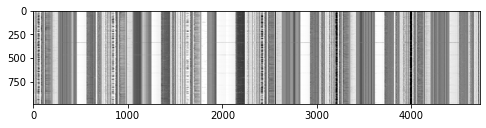

In [37]:
plt.imshow(tsf_u, cmap='binary')

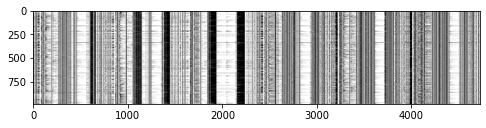

In [470]:
plt.imshow(tsf_u_hash.values, cmap='binary')

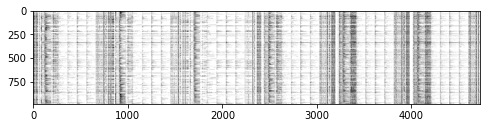

In [236]:
plt.imshow(tsf_u_hash1.values, cmap='binary')

## LSH on TSFresh 

In [65]:
import os
import time
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt

def cossim(u,v):
    norm = np.linalg.norm(u)*np.linalg.norm(v) # 向量范数之积 所有元素的平方和
    cosine = u@v/norm  #矩阵乘法
    ang = np.arccos(cosine)
    return 1-ang/np.pi

In [616]:
np.linalg.norm([[1,2],[3,4]])

5.477225575051661

In [275]:
np.linalg.norm([1,2])

2.23606797749979

In [279]:
np.linalg.norm([2.23606797749979,5])

5.477225575051661

In [320]:
np.array([[1,2],[1,2]]) @ np.array([[3,4],[3,4]])

array([[ 9, 12],
       [ 9, 12]])

In [346]:
cossim(np.array([[1,2],[1,2]]),np.array([[3,4],[3,4]]))

array([[0.63185596, 0.68031282],
       [0.63185596, 0.68031282]])

In [353]:
cossim(np.array([1,2]),np.array([3,4]))

0.9427508529512998

In [352]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity(X=np.array([[1,2],[1,2]]),Y=np.array([[3,4],[3,4]]))

array([[0.98386991, 0.98386991],
       [0.98386991, 0.98386991]])

In [355]:
from scipy import spatial
1-spatial.distance.cosine([1,2], [3,4])

0.9838699100999074

In [307]:
np.array([[1,2],[1,2]])@ np.array([3,4])

array([11, 11])

In [391]:
A = pd.DataFrame(extracted_features).iloc[:100,:200]
A=A.reset_index(drop=True).values
D,n = 200,100
A

array([[ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16],
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         5.30357508e-17,  3.14709710e-16, -2.12769669e-16]])

In [375]:
S = pd.DataFrame(tsf_u_hash).iloc[:100,:200].values
S

array([[0, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       [0, 1, 1, ..., 0, 1, 0]])

In [379]:
from sklearn.metrics import jaccard_score
jaccard_score(S[99,:],S[0,:]),jaccard_score(S[99,:],S[98,:]),jaccard_score(S[99,:],S[50,:])

(0.4791666666666667, 0.16666666666666666, 0.42105263157894735)

In [411]:
cossim(A[0,:],A[99,:]),cossim(A[98,:],A[99,:]),cossim(A[99,:],A[50,:])

(0.9797347836235454, 0.7767906803161431, 0.9708394828087121)

In [617]:
for (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(A.iloc[:4,:4])],2):
    print(u, v)

NameError: name 'A' is not defined

In [395]:
# Brute force calculation baseline
true_pairs_dict = {}

thresh = 0.8
cos_vals = []
start = time.time()
# # (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(
for u in range(99):
    for v in range(99):
        if u!=v:
            val = cossim(A[v,:],A[u,:])
            cos_vals.append(val)
            if val > thresh:
                if (v,u) not in true_pairs_dict:
                    true_pairs_dict[(u,v)] = val
        
        
t_brute = time.time()-start

# save just the keys without the values. Easier to compare later to LSH
true_pairs = set(true_pairs_dict.keys())

print(f"Brute force calculation time: {t_brute:.3f}")
print(f"Discovered pairs:")
for k, v in true_pairs_dict.items():
    print(f"Pair: {k},\tSimilarity: {v:.2f}.")

/tmp/ipykernel_896228/1471083435.py:11: RuntimeWarning: invalid value encountered in arccos
  ang = np.arccos(cosine)


Brute force calculation time: 0.194
Discovered pairs:
Pair: (0, 1),	Similarity: 0.97.
Pair: (0, 4),	Similarity: 0.98.
Pair: (0, 5),	Similarity: 0.99.
Pair: (0, 6),	Similarity: 0.93.
Pair: (0, 9),	Similarity: 0.94.
Pair: (0, 10),	Similarity: 0.97.
Pair: (0, 11),	Similarity: 0.91.
Pair: (0, 18),	Similarity: 0.96.
Pair: (0, 19),	Similarity: 0.84.
Pair: (0, 31),	Similarity: 0.80.
Pair: (0, 37),	Similarity: 0.82.
Pair: (0, 39),	Similarity: 0.89.
Pair: (0, 40),	Similarity: 0.99.
Pair: (0, 41),	Similarity: 0.86.
Pair: (0, 44),	Similarity: 0.86.
Pair: (0, 45),	Similarity: 0.93.
Pair: (0, 46),	Similarity: 0.90.
Pair: (0, 50),	Similarity: 0.95.
Pair: (0, 51),	Similarity: 0.91.
Pair: (0, 53),	Similarity: 0.88.
Pair: (0, 55),	Similarity: 0.95.
Pair: (0, 56),	Similarity: 0.87.
Pair: (0, 59),	Similarity: 0.92.
Pair: (0, 60),	Similarity: 0.91.
Pair: (0, 64),	Similarity: 0.94.
Pair: (0, 66),	Similarity: 0.92.
Pair: (0, 68),	Similarity: 0.98.
Pair: (0, 69),	Similarity: 0.83.
Pair: (0, 70),	Similarity: 

In [396]:
len(true_pairs)

1239

In [413]:
# Brute force calculation baseline
hash_pairs_dict = {}

thresh = 0.5
jc_vals = []
start = time.time()
# # (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(
for u in range(99):
    for v in range(99):
        if u!=v:
            val = jaccard_score(S[v,:],S[u,:])
            jc_vals.append(val)
            if val > thresh:
                if (v,u) not in hash_pairs_dict:
                    hash_pairs_dict[(u,v)] = val
        

t_brute = time.time()-start

# save just the keys without the values. Easier to compare later to LSH
hash_pairs = set(hash_pairs_dict.keys())

print(f"Brute force calculation time: {t_brute:.3f}")
print(f"Discovered pairs:")
print(len(hash_pairs))

Brute force calculation time: 4.529
Discovered pairs:
980


In [414]:
# LSH
b, r = 20, 5

n = b*r
print(f"Transition probability: {(1/b)**(1/r):.2f}")

Transition probability: 0.55


In [ ]:
# memory usage查看
# 先假设有个简单的hash, hash bucket里有很多user node, bucket里面才有user/item的semantic关系
# 俩层走，大外层是temporal bucket, 内层是semantic, buckets之间的关系（cluster）

# 学会 Thanet的code
# 画出一个推荐的流程图，从头到尾
# feature hash to buckets
# aggregate 一个bucket里的, 求TF-IDF，作为bucket的表示，

# 用semantic做bucket,再倒过来实施aggreagate temporal featue（用不着tf-idf, 直接计算mean、median等）




In [43]:
D,n

(200, 100)

In [40]:
A.shape

(100, 200)

In [48]:
S = pd.DataFrame(tsf_u_hash).iloc[:100,:200].values
S.shape

(100, 200)

In [46]:
# # Compute signature matrix
R = A@np.random.randn(D,n) # @ is matrix multiplication
S = np.where(R>0,1,0)

# # Break into bands
# S = np.split(S, b, axis=1)
S.shape

(100, 100)

In [419]:
len(S)

20

In [415]:
# Compute LSH pairs
start = time.time()

# # Compute signature matrix
# R = A@np.random.randn(D,n) # @ is matrix multiplication
# S = np.where(R>0,1,0)

# # Break into bands
# S = np.split(S, b, axis=1)

# column vector to convert binary vector to integer e.g. (1,0,1)->5
binary_column = 2**np.arange(r).reshape(-1,1)

# convert each band into a single integer, 
# i.e. convert band matrices to band columns
S = np.hstack([M@binary_column for M in S])

# Every value in the matrix represents a hash bucket assignment
# For every bucket in row i, add index i to that bucket
d = collections.defaultdict(set)
with np.nditer(S,flags=['multi_index']) as it:
    for x in it:
        d[int(x)].add(it.multi_index[0])
        
# For every bucket, find all pairs. These are the LSH pairs.
candidate_pairs = set()
for k,v in d.items():
    if len(v) > 1:
        for pair in itertools.combinations(v,2):
            candidate_pairs.add(tuple(sorted(pair)))

# Finally, perform the actually similarity computation
# to weed out false positive
lsh_pairs = set()
for (i,j) in candidate_pairs:
    if cossim(A[i],A[j]) > thresh:
        lsh_pairs.add((i,j))
        
t_lsh = time.time()-start

print(f"LSH calculation time: {t_lsh:.3f}")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 10)

In [522]:
len(candidate_pairs)

463

In [521]:
len(true_pairs)

316

# LSH
https://www.learndatasci.com/tutorials/building-recommendation-engine-locality-sensitive-hashing-lsh-python/

https://onestopdataanalysis.com/lsh/


In [3]:
pip install datasketch

     |████████████████████████████████| 67 kB 3.5 MB/s eta 0:00:011


## PCA-USER + LSH

### Method 1 把tagging-PCA 结果group

In [ ]:
vectors_1d = PCA(n_components=1).fit_transform(df_selected)
df_user_1d = pd.concat([df.filter(regex="[^time_stamp]").loc[:,'userID'],pd.DataFrame(vectors_1d)],axis=1)

In [ ]:
df_user_lst = pd.DataFrame(df_user_1d.groupby('userID').apply(lambda x: list(x[0])))
df_user_lst['tag_num'] = df_user_lst[0].apply(len)
df_user_lst[df_user_lst.tag_num>2]

,0,tag_num
userID,,
127,"[0.43703809454894255, 0.4335724797796725, 0.43...",23
190,"[-0.045189717425882174, -0.044055620195745576,...",26
325,"[-0.4319548865480935, 0.3567702853601463, -0.0...",5
383,"[0.989486860731099, 0.9898309391580569, 0.8174...",4
477,"[0.4464709689351199, 0.446470647628355, 0.4463...",26
...,...,...
71420,"[-0.11863773063393639, -0.11918003643387194, -...",56
71478,"[-0.7498674851406913, -0.7660245891539287, 0.0...",3
71497,"[0.5514569995000097, 0.5511110666836331, 0.530...",41


In [ ]:
    start_time = time.time()
    minhash = []
    
    for pcas in df_user_lst[0]:
        pcas = str(pcas)
        m = MinHash(num_perm=32)
        for s in pcas:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=32)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))

### Method 2 把User-PCA 2D结果代入minHash

In [ ]:

m = MinHash()
data1 = [ 0.64816147, -0.54253993]
for d in data1:
  m.update(str(d).encode('utf8'))

In [ ]:
vectors

array([[ 0.77890402, -0.39060472],
       [-0.23016071, -0.14797051],
       [ 0.43704139, -0.29322769],
       ...,
       [ 1.05479409, -0.42498046],
       [ 1.07457846, -0.33916029],
       [ 1.08325624, -0.3532431 ]])

In [ ]:
    start_time = time.time()
    minhash = []
    
    for pcas in vectors:
        m = MinHash(num_perm=32)
        for s in pcas:
            m.update(str(s).encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=32)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))

It took 28.41197967529297 seconds to build forest.


In [ ]:
m.hashvalues

array([ 170058183,  231972810,   13184479,   31312792,  132721297,
        162003033,  223352304,  159809555,   56920750,  650229806,
         86101458,  267848141,  589979148,   60243568,  185660087,
        716560562,  303782223,  518718070,   75816273,  345530959,
        777096236,  171205302,  377605013,  225330139,  478898225,
        209569695,    3651271, 1313042232,   23909840,  146302257,
        614910999,   73081062], dtype=uint64)

In [ ]:
    start_time = time.time()
    
    query = vectors[2]
    m = MinHash(num_perm=32)
    for s in query:
        m.update(str(s).encode('utf8'))
        
    idx_array = np.array(forest.query(m, 10))
    if len(idx_array) == 0: 
      print("if your query is empty, return none")
    
    print(idx_array)

    # result = database.iloc[idx_array]['title']
    
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    

[2]
It took 0.002424478530883789 seconds to query forest.


## MinHash Example
http://ekzhu.com/datasketch/minhash.html

In [ ]:
from datasketch import MinHash

data1 = ['minhash', 'is', 'a', 'probabilistic', 'data', 'structure', 'for',
        'estimating', 'the', 'similarity', 'between', 'datasets']
data2 = ['minhash', 'is', 'a', 'probability', 'data', 'structure', 'for',
        'estimating', 'the', 'similarity', 'between', 'documents']

m1, m2 = MinHash(), MinHash()
for d in data1:
    m1.update(d.encode('utf8'))
for d in data2:
    m2.update(d.encode('utf8'))
print("Estimated Jaccard for data1 and data2 is", m1.jaccard(m2))

s1 = set(data1)
s2 = set(data2)
actual_jaccard = float(len(s1.intersection(s2)))/float(len(s1.union(s2)))
print("Actual Jaccard for data1 and data2 is", actual_jaccard)

Estimated Jaccard for data1 and data2 is 0.7109375
Actual Jaccard for data1 and data2 is 0.7142857142857143


In [ ]:
m1.hashfunc

<function datasketch.hashfunc.sha1_hash32>

In [ ]:
m1.hashvalues

array([ 297616339,  279951299,  113505080,  311917730,    1735256,
        278730948,  249258812,  306660385,  386953741,  423518424,
        120511132,  607298570,  490287863,  115094987,  290874010,
         58384851,   82568189,  483072302,  312640790,   86174351,
        198731659,  788039411,   54507159,  828911042,   93863906,
         16071831,  260431759,  316407020,  261463262, 1524825895,
        648376383,  206326676,  176707072,   18714679,  478567185,
        180270267,   89979232,  111646838,  240537181,  342142234,
        620096571, 1407834531,  330961037,  663383944, 1105899070,
        181581527,  132285593,  375422674, 1436377075,  484486034,
        252946215,   87331021,  374968398,  968098446,   72863372,
        484842735,  179471924,  672911886,   14648640,  656664915,
        417888415,  271335895,   10055390,   48164330,  430379235,
        622471011,  822143071,  365346353,  210165943,  633147285,
        415249929,  133327723,  258658760,  272079305,  134604

## MinHash example2 
https://towardsdatascience.com/locality-sensitive-hashing-how-to-find-similar-items-in-a-large-set-with-precision-d907c52b05fc
 

In [64]:
import os
import time
import itertools
import collections
import numpy as np
import matplotlib.pyplot as plt

def cossim(u,v):
    norm = np.linalg.norm(u)*np.linalg.norm(v)
    cosine = u@v/norm
    ang = np.arccos(cosine)
    return 1-ang/np.pi

In [4]:
# get some random data points
N = 1000
D= 50
A = np.random.randn(N,D)
# artificially make some similar to others
A[5] = A[99] +np.random.randn(D)*0.05
A[20] = A[85] +np.random.randn(D)*0.15
A[13] = A[19] +np.random.randn(D)*0.25
A[56] = A[71] +np.random.randn(D)*0.5
A[45] = A[49] +np.random.randn(D)*0.66

In [36]:
df.shape

(47957, 21)

In [47]:
A = df.sample(1000, random_state=0).filter(regex="[^time_stamp]").iloc[:,:13].values
A

array([[63725,   490,   780, ...,    40,     4,    31],
       [19885,   356,  2347, ...,     8,     1,    28],
       [41740,  3994,   371, ...,    23,     2,    30],
       ...,
       [41838,  1237,  6800, ...,     3,     1,    31],
       [44285,  5791, 14588, ...,     2,     1,    31],
       [33384, 53129,  9689, ...,    39,     3,    30]])

In [48]:
# Brute force calculation baseline
true_pairs_dict = {}

thresh = 0.8

start = time.time()
for (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(A)],2):
    val = cossim(u,v)
    if val > thresh:
        true_pairs_dict[(i,j)] = val
t_brute = time.time()-start

# save just the keys without the values. Easier to compare later to LSH
true_pairs = set(true_pairs_dict.keys())

print(f"Brute force calculation time: {t_brute:.3f}")
print(f"Discovered pairs:")
for k, v in true_pairs_dict.items():
    print(f"Pair: {k},\tSimilarity: {v:.2f}.")

Streaming output truncated to the last 5000 lines.
Pair: (421, 497),	Similarity: 0.81.
Pair: (421, 498),	Similarity: 0.90.
Pair: (421, 499),	Similarity: 0.91.
Pair: (421, 501),	Similarity: 0.85.
Pair: (421, 502),	Similarity: 0.95.
Pair: (421, 503),	Similarity: 0.95.
Pair: (421, 504),	Similarity: 0.98.
Pair: (421, 505),	Similarity: 0.92.
Pair: (421, 506),	Similarity: 0.82.
Pair: (421, 508),	Similarity: 0.94.
Pair: (421, 509),	Similarity: 0.95.
Pair: (421, 510),	Similarity: 0.91.
Pair: (421, 511),	Similarity: 0.98.
Pair: (421, 512),	Similarity: 0.91.
Pair: (421, 516),	Similarity: 0.82.
Pair: (421, 517),	Similarity: 0.87.
Pair: (421, 518),	Similarity: 0.84.
Pair: (421, 519),	Similarity: 0.91.
Pair: (421, 520),	Similarity: 0.94.
Pair: (421, 521),	Similarity: 0.95.
Pair: (421, 523),	Similarity: 0.97.
Pair: (421, 524),	Similarity: 0.96.
Pair: (421, 525),	Similarity: 0.85.
Pair: (421, 526),	Similarity: 0.98.
Pair: (421, 527),	Similarity: 0.98.
Pair: (421, 528),	Similarity: 0.95.
Pair: (421, 5

KeyboardInterrupt: ignored

In [5]:
# Brute force calculation baseline
true_pairs_dict = {}

thresh = 0.8

start = time.time()
for (i,u),(j,v) in itertools.combinations([(i,x) for i,x in enumerate(A)],2):
    val = cossim(u,v)
    if val > thresh:
        true_pairs_dict[(i,j)] = val
t_brute = time.time()-start

# save just the keys without the values. Easier to compare later to LSH
true_pairs = set(true_pairs_dict.keys())

print(f"Brute force calculation time: {t_brute:.3f}")
print(f"Discovered pairs:")
for k, v in true_pairs_dict.items():
    print(f"Pair: {k},\tSimilarity: {v:.2f}.")

Brute force calculation time: 10.004
Discovered pairs:
Pair: (5, 99),	Similarity: 0.98.
Pair: (13, 19),	Similarity: 0.92.
Pair: (20, 85),	Similarity: 0.95.
Pair: (45, 49),	Similarity: 0.87.
Pair: (56, 71),	Similarity: 0.81.


In [6]:
# LSH
b, r = 50, 18

n = b*r
print(f"Transition probability: {(1/b)**(1/r):.2f}")

Transition probability: 0.80


In [31]:
S

array([[ 59962, 130424,   6942, ..., 132247, 221223, 109767],
       [252191, 166394, 178512, ..., 259674,  66405,  26603],
       [255474, 244728,  14700, ..., 218581, 140055, 123403],
       ...,
       [ 15567, 219786,  50557, ..., 179302,  54129, 184969],
       [ 21923,  47743, 191981, ..., 260437, 165731,  41347],
       [227487, 214427, 170919, ...,   9460,  23088,  15325]])

In [54]:
D,n = 13,1000

In [57]:
S

[array([[0, 1, 1, ..., 0, 1, 1],
        [0, 1, 1, ..., 0, 1, 1],
        [1, 1, 1, ..., 0, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 1, 1],
        [1, 0, 1, ..., 0, 1, 1],
        [1, 1, 0, ..., 0, 1, 1]]), array([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 1, 1, 0],
        [0, 0, 0, ..., 0, 1, 0]]), array([[1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 0, 0, 1],
        [1, 0, 1, ..., 1, 0, 1]]), array([[1, 1, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        ...,
        [0, 1, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0],
        [0, 1, 0, ..., 1, 0, 0]]), array([[1, 1, 1, ..., 0, 1, 0],
        [1, 1, 1, ..., 0, 1, 0],
        [1, 1, 1, ..., 0, 1, 0],
        ...,
        [1, 1, 1, ..., 0, 1, 0],
       

In [28]:
# Compute LSH pairs
start = time.time()

# Compute signature matrix
R = A@np.random.randn(D,n) # @ is matrix multiplication
S = np.where(R>0,1,0)

# Break into bands
S = np.split(S, b, axis=1)

# column vector to convert binary vector to integer e.g. (1,0,1)->5
binary_column = 2**np.arange(r).reshape(-1,1)

# convert each band into a single integer, 
# i.e. convert band matrices to band columns
S = np.hstack([M@binary_column for M in S])

# Every value in the matrix represents a hash bucket assignment
# For every bucket in row i, add index i to that bucket
d = collections.defaultdict(set)
with np.nditer(S,flags=['multi_index']) as it:
    for x in it:
        d[int(x)].add(it.multi_index[0])
        
# For every bucket, find all pairs. These are the LSH pairs.
candidate_pairs = set()
for k,v in d.items():
    if len(v) > 1:
        for pair in itertools.combinations(v,2):
            candidate_pairs.add(tuple(sorted(pair)))

# Finally, perform the actually similarity computation
# to weed out false positive
lsh_pairs = set()
for (i,j) in candidate_pairs:
    if cossim(A[i],A[j]) > thresh:
        lsh_pairs.add((i,j))
        
t_lsh = time.time()-start

print(f"LSH calculation time: {t_lsh:.3f}")

LSH calculation time: 0.313


In [32]:
candidate_pairs

{(48, 849),
 (211, 840),
 (217, 651),
 (87, 528),
 (643, 931),
 (128, 815),
 (56, 444),
 (202, 624),
 (495, 542),
 (812, 915),
 (195, 915),
 (254, 761),
 (440, 736),
 (37, 770),
 (168, 378),
 (683, 902),
 (578, 858),
 (697, 872),
 (300, 879),
 (616, 888),
 (105, 623),
 (140, 960),
 (929, 983),
 (17, 64),
 (125, 628),
 (291, 545),
 (436, 660),
 (646, 771),
 (43, 346),
 (150, 722),
 (281, 609),
 (138, 631),
 (265, 946),
 (379, 799),
 (215, 615),
 (218, 882),
 (38, 595),
 (330, 735),
 (167, 622),
 (665, 894),
 (25, 49),
 (703, 839),
 (705, 825),
 (375, 715),
 (212, 735),
 (12, 678),
 (380, 675),
 (88, 154),
 (144, 535),
 (73, 285),
 (272, 955),
 (20, 892),
 (257, 915),
 (96, 234),
 (343, 994),
 (188, 320),
 (550, 793),
 (594, 604),
 (64, 584),
 (176, 423),
 (32, 188),
 (466, 641),
 (73, 91),
 (273, 755),
 (18, 588),
 (148, 611),
 (558, 761),
 (208, 968),
 (261, 391),
 (704, 973),
 (28, 661),
 (212, 445),
 (286, 401),
 (449, 466),
 (72, 466),
 (806, 877),
 (309, 395),
 (366, 675),
 (555, 9

In [29]:
d

defaultdict(set,
            {59962: {0},
             130424: {0},
             6942: {0, 52},
             39702: {0, 144},
             261595: {0},
             67843: {0},
             249737: {0},
             213291: {0},
             51803: {0},
             111379: {0},
             179342: {0},
             147009: {0},
             220926: {0},
             17707: {0},
             2021: {0},
             135004: {0, 376},
             13433: {0, 705},
             58239: {0, 202},
             73501: {0},
             237283: {0},
             5379: {0, 314},
             229774: {0, 103},
             8495: {0},
             182904: {0},
             109729: {0},
             156653: {0},
             159314: {0},
             235280: {0},
             140626: {0},
             176755: {0},
             257300: {0},
             45864: {0},
             78103: {0},
             97290: {0},
             207957: {0},
             174499: {0},
             113044: {0},
      

## LSH for cosinesimilarity

https://www.kaggle.com/paulrohan2020/location-sensitive-hashing-for-cosine-similarity/data

In [ ]:
vector_1 = [3, 45, 7, 2]
vector_2 = [2, 54, 13, 15]
np.dot(vector_1, vector_2),np.array(vector_1) * np.array(vector_2)

(2557, array([   6, 2430,   91,   30]))

In [ ]:
np.sum(np.array(vector_1) * np.array(vector_2))

2557

In [ ]:
np.linalg.norm([3,4])

5.0

In [ ]:
np.linalg.norm(np.array(vector_1) * np.array(vector_2))

2431.8957625687826

In [ ]:
cosine_similarity_2 = np.dot(vector_1, vector_2) / (np.linalg.norm(vector_1) * np.linalg.norm(vector_2))
print(cosine_similarity_2)

0.9722842517123499


https://tostr.pl/blog/locality-sensitive-hashing-for-angular-distance-in-python/

In [ ]:
def cosine_similarity(a, b):
    return np.dot(a, b) / (np.sqrt(np.dot(a, a)) * np.sqrt(np.dot(b, b)))

def angular_distance(a, b):
    return np.arccos(cosine_similarity(a, b)) / np.pi

class AngularLSHIndex(object):
    
    def __init__(self, dim, hash_no):
        # dim - dimensionality of used vectors
        self.dim = dim
        self.hash_no = hash_no
        # draw hash_no random vectors
        self.hash_vecs = np.random.uniform(low=-1.0, size=(hash_no, dim))
        # standard python dictionary will be our "index"
        # for small hash_no values this could be a list
        self.db = {}
    

    def get_hash_key(self, vec):
        # compute dot product of all hash vectors
        # and check the sign
        sv = vec.dot(self.hash_vecs.T) > 0
        # binary vector to byte string
        return np.packbits(sv).tostring()

    def add(self, vec):
        k = self.get_hash_key(vec)
        self.db.setdefault(k, []).append(vec)
    
    def get(self, vec):
        k = self.get_hash_key(vec)
        return self.db.get(k, [])

        
def dot_binary(vec, bin_arr):
    return np.apply_along_axis(
        lambda x: np.sum(vec[x]) - np.sum(vec[~x]),
        1,
        bin_arr
        )

## NIPS Papers dataset
https://www.kaggle.com/benhamner/nips-papers?select=papers.csv

https://www.kaggle.com/benhamner/exploring-the-nips-papers

In [ ]:
import numpy as np
import pandas as pd
import re
import time
from datasketch import MinHash, MinHashLSHForest

In [ ]:
def preprocess(text):
    text = re.sub(r'[^\w\s]','',text)
    tokens = text.lower()
    tokens = tokens.split()
    return tokens

In [ ]:
text = 'The devil went down to Georgia'
print('The shingles (tokens) are:', preprocess(text))

The shingles (tokens) are: ['the', 'devil', 'went', 'down', 'to', 'georgia']


In [ ]:
#Number of Permutations
permutations = 128

#Number of Recommendations to return
num_recommendations = 1

In [ ]:
def get_forest(data, perms):
    start_time = time.time()
    
    minhash = []
    
    for text in data['text']:
        tokens = preprocess(text)
        m = MinHash(num_perm=perms)
        for s in tokens:
            m.update(s.encode('utf8'))
        minhash.append(m)
        
    forest = MinHashLSHForest(num_perm=perms)
    
    for i,m in enumerate(minhash):
        forest.add(i,m)
        
    forest.index()
    
    print('It took %s seconds to build forest.' %(time.time()-start_time))
    
    return forest

In [ ]:
def predict(text, database, perms, num_results, forest):
    start_time = time.time()
    
    tokens = preprocess(text)
    m = MinHash(num_perm=perms)
    for s in tokens:
        m.update(s.encode('utf8'))
        
    idx_array = np.array(forest.query(m, num_results))
    if len(idx_array) == 0:
        return None # if your query is empty, return none
    
    result = database.iloc[idx_array]['title']
    
    print('It took %s seconds to query forest.' %(time.time()-start_time))
    
    return result

In [ ]:
db = pd.read_csv('/content/drive/MyDrive/PY/TimeSeriesRecSys/paper_dataset/papers.csv')
db['text'] = db['title'] + ' ' + db['abstract']
forest = get_forest(db, permutations)

It took 19.092541933059692 seconds to build forest.


In [ ]:
num_recommendations = 5
title = 'Using a neural net to instantiate a deformable model'
result = predict(title, db, permutations, num_recommendations, forest)
print('\n Top Recommendation(s) is(are) \n', result)

It took 0.011797666549682617 seconds to query forest.

 Top Recommendation(s) is(are) 
 995     Neural Network Weight Matrix Synthesis Using O...
5       Using a neural net to instantiate a deformable...
5191    A Self-Organizing Integrated Segmentation and ...
2069    Analytic Solutions to the Formation of Feature...
2457    Inferring Neural Firing Rates from Spike Train...
Name: title, dtype: object


# AE

In [ ]:
vectors

array([[ 0.64816165, -0.54254075,  0.43390561, ..., -0.01808777,
         0.0044388 ,  0.00407495],
       [-0.30471315, -0.16870398, -0.51245992, ..., -0.02335   ,
        -0.00237591,  0.00583273],
       [ 0.31986092, -0.35968197, -0.47924914, ..., -0.00350239,
        -0.00110114,  0.00302308],
       ...,
       [-0.13978504, -0.17542926,  0.56723269, ...,  0.02802297,
         0.00094243, -0.00681024],
       [ 0.63543054, -0.56058921,  0.3278742 , ..., -0.01926087,
         0.00555403,  0.00224709],
       [ 0.84964527, -0.58998468, -0.38528483, ...,  0.01120511,
        -0.0018659 , -0.00274716]])

In [ ]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, LSTM, RepeatVector
from keras.models import Model
from keras import regularizers

In [ ]:
input_num = Input(shape=(19,))
encoded = Dense(64, activation='relu')(input_num)
encoded = Dense(32, activation='relu')(encoded)


decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(19, activation='softmax')(decoded)

Model_autoencoder_DL = Model(input_num, decoded)
Model_encoder = Model(input_num, encoded)

encoded_input = Input(shape=(32,))
#中间层无法引用autoencoder中的层，或者构建时的参数，所以根据模型结构手动构造输入层
# retrieve the last layer of the autoencoder model
decoder_layer = Model_autoencoder_DL.layers[-1]
#直接引用autoencoder最后一层
# create the decoder model
Model_decoder = Model(encoded_input, decoder_layer(encoded_input))


Model_autoencoder_DL.compile(optimizer='rmsprop', loss='binary_crossentropy')

In [ ]:
Model_autoencoder_DL.fit(df_user.values, df_user.values,
                epochs=100,
                batch_size=32,
                # shuffle=True,
                )

Epoch 1/100
67/67 [==============================] - 1s 1ms/step - loss: 1.3684
Epoch 2/100
67/67 [==============================] - 0s 1ms/step - loss: 0.8076
Epoch 3/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7743
Epoch 4/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7536
Epoch 5/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7562
Epoch 6/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7460
Epoch 7/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7502
Epoch 8/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7479
Epoch 9/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7408
Epoch 10/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7450
Epoch 11/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7326
Epoch 12/100
67/67 [==============================] - 0s 1ms/step - loss: 0.7272
Epoch 13/100
67/67 [=================

In [ ]:
Model_encoder.predict(df_user.values[:1])

array([[0.        , 0.        , 0.        , 0.8751362 , 0.21657875,
        0.        , 0.4115395 , 0.07865485, 0.        , 0.        ,
        0.52489686, 0.6915984 , 1.2215767 , 0.8368807 , 0.        ,
        0.        , 0.25561067, 0.4786983 , 0.21155459, 0.        ,
        0.        , 0.57903266, 0.0768693 , 0.31829506, 0.25254583,
        0.        , 0.5024194 , 0.40149716, 0.41169012, 0.        ,
        0.24791877, 0.4858034 ]], dtype=float32)